## Import des données

In [1]:
# limit the output to 3000 charachters
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 5000})
from IPython.display import clear_output # print the last output of a loop

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Note : le fichier world_income_distribution.csv contient les mêmes
# données que 'data-projet7.csv' mais en plus contient les données
# sur les populations
df_income_quantile = pd.read_csv('data-projet7.csv')
df_income_quantile

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [4]:
# Structure des données pour un pays
df_income_quantile[df_income_quantile['country'] == 'FRA']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3300,FRA,2008,1,100,"2958,304",30357
3301,FRA,2008,2,100,"4412,6753",30357
3302,FRA,2008,3,100,"4939,635",30357
3303,FRA,2008,4,100,"5422,9165",30357
3304,FRA,2008,5,100,"5906,5376",30357
...,...,...,...,...,...,...
3395,FRA,2008,96,100,"39873,51",30357
3396,FRA,2008,97,100,"43693,035",30357
3397,FRA,2008,98,100,"49489,582",30357
3398,FRA,2008,99,100,"60758,613",30357


In [5]:
# les variables income et gdpppp devraient être numeriques
df_income_quantile.dtypes

country         object
year_survey      int64
quantile         int64
nb_quantiles     int64
income          object
gdpppp          object
dtype: object

In [6]:
# Modification du type des variables income et  gdppp en numeriques(float)

df_income_quantile['gdpppp'] = df_income_quantile['gdpppp'].str.replace(
    ',', '.').astype(float)
df_income_quantile['income'] = df_income_quantile['income'].str.replace(
    ',', '.').astype(float)
df_income_quantile.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [7]:
# le type des variables 'income' et 'gdpppp' est bien numerique
df_income_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [8]:
df_income_quantile['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

In [9]:
df_income_quantile[df_income_quantile['gdpppp'].isnull()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


## Résumer les données utilisées : 

In [10]:
df_income_quantile['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

### Année des données utilisées :

In [11]:
# Les années des données utilisées pour déterminer le revenu par quantile par pays
années = df_income_quantile['year_survey'].unique()
print(f"les années des données utilisées sont les suivantes:{années}")

print('2008 sera toutefois considéré comme année de reference compte tenue\ndu fait que les données sont datées de cette année là d\'après l\'énoncé')

les années des données utilisées sont les suivantes:[2008 2009 2010 2007 2006 2011 2004]
2008 sera toutefois considéré comme année de reference compte tenue
du fait que les données sont datées de cette année là d'après l'énoncé


In [12]:
# Verifions la disponibilité des données sur le revenu par année

print(
    f"2004={len(df_income_quantile[df_income_quantile['year_survey'] == 2004])}")
print(
    f"2006={len(df_income_quantile[df_income_quantile['year_survey'] == 2006])}")
print(
    f"2007={len(df_income_quantile[df_income_quantile['year_survey'] == 2007])}")
print(
    f"2008={len(df_income_quantile[df_income_quantile['year_survey'] == 2008])}")
print(
    f"2009={len(df_income_quantile[df_income_quantile['year_survey'] == 2009])}")
print(
    f"2011={len(df_income_quantile[df_income_quantile['year_survey'] == 2011])}")

2004=100
2006=500
2007=1500
2008=7599
2009=1200
2011=100


L'année 2008 est celle où l'on dispose de plus de données sur les revenus des menages par quantiles dans les pays. Le modèle sera donc construite sur la base de cette année.

### Nombre de pays présents

In [13]:
country_nb = df_income_quantile['country'].nunique()
print("il y'a {} pays présent sur le fichier des données\
 sur la repartition des revenus par pays".format(country_nb))

il y'a 116 pays présent sur le fichier des données sur la repartition des revenus par pays


###  Population couverte par l'anlayse en pourcentage

In [14]:
# Import des données sur la population des pays 
df_population = pd.read_csv('population.csv', sep=";", usecols=['Country Name', 'Country Code', 'Indicator Name', '2008'])
df_population.head() 

,Country Name,Country Code,Indicator Name,2008
0,Aruba,ABW,"Population, total",101362.0
1,Africa Eastern and Southern,AFE,"Population, total",491173160.0
2,Afghanistan,AFG,"Population, total",27722281.0
3,Africa Western and Central,AFW,"Population, total",331772330.0
4,Angola,AGO,"Population, total",21695636.0


In [15]:
df_population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
2008              float64
dtype: object

In [16]:
# merge des datasets contenant les données sur les revenus et la population
merge_income_pop = df_income_quantile.merge(df_population, how='left',
                                            left_on='country', right_on='Country Code')
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0


#### determination du quantile manquant

In [17]:
# il y'a un pays dont il manque un percentile ?
# on aurait dû obtenir 11600 lignes
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   2008            11499 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 996.8+ KB


In [18]:
# determinons le quantile manquant le cas echeant
test_quantile = merge_income_pop[['country', 'quantile']]
test_quantile

,country,quantile
0,ALB,1
1,ALB,2
2,ALB,3
3,ALB,4
4,ALB,5
...,...,...
11594,COD,96
11595,COD,97
11596,COD,98
11597,COD,99


In [19]:
test_quantile_count  = test_quantile.groupby(['country'])['quantile'].count()
test_quantile_count

country
ALB    100
ARG    100
ARM    100
AUT    100
AZE    100
      ... 
VEN    100
VNM    100
XKX    100
YEM    100
ZAF    100
Name: quantile, Length: 116, dtype: int64

In [20]:
# problème avec la lituanie qui compte 99 centile au lieu de 100
# Il lui manque donc une classe de revenu
test_quantile_count[test_quantile_count.values == 99]

country
LTU    99
Name: quantile, dtype: int64

In [21]:
merge_income_pop[merge_income_pop['country'] == 'LTU']

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,LTU,"Population, total",3198231.0
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,LTU,"Population, total",3198231.0
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,LTU,"Population, total",3198231.0
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,LTU,"Population, total",3198231.0
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,LTU,"Population, total",3198231.0
...,...,...,...,...,...,...,...,...,...,...
6294,LTU,2008,96,100,14597.0360,17571.0,Lithuania,LTU,"Population, total",3198231.0
6295,LTU,2008,97,100,15659.0080,17571.0,Lithuania,LTU,"Population, total",3198231.0
6296,LTU,2008,98,100,17883.8770,17571.0,Lithuania,LTU,"Population, total",3198231.0
6297,LTU,2008,99,100,22551.1700,17571.0,Lithuania,LTU,"Population, total",3198231.0


In [22]:
# exemple avec le Brasil on a bien 100 classes de revenus
len(merge_income_pop[merge_income_pop['country'] == 'BRA'])

100

In [23]:
# recherchons les pays dont on a pas les infos sur la population
# Il s'agit de Taiwan ( according to ISO-3166 Alpha-3 - TWN is the three-letter country abbreviation for Taiwan.)
df_twn = merge_income_pop[merge_income_pop['Country Name'].isna()]
df_twn

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
10399,TWN,2008,1,100,3477.1800,25342.0,NaN,NaN,NaN,NaN
10400,TWN,2008,2,100,4740.2637,25342.0,NaN,NaN,NaN,NaN
10401,TWN,2008,3,100,5331.3013,25342.0,NaN,NaN,NaN,NaN
10402,TWN,2008,4,100,5761.6577,25342.0,NaN,NaN,NaN,NaN
10403,TWN,2008,5,100,6093.2017,25342.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10494,TWN,2008,96,100,38123.4600,25342.0,NaN,NaN,NaN,NaN
10495,TWN,2008,97,100,41663.7900,25342.0,NaN,NaN,NaN,NaN
10496,TWN,2008,98,100,46650.5820,25342.0,NaN,NaN,NaN,NaN
10497,TWN,2008,99,100,54016.9920,25342.0,NaN,NaN,NaN,NaN


In [24]:
# un seul pays n'a pas de donnée sur la population : TWN
df_twn['country'].unique()

array(['TWN'], dtype=object)

In [25]:
# verifions que les données sur la Chine ne tient pas compte de Taïwan
merge_income_pop[merge_income_pop['Country Name'] == 'China'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
1700,CHN,2007,1,100,16.719418,5712.0,China,CHN,"Population, total",1.324655e+09


In [26]:
# import données sur la chine en 2008
# source FAO
df_china_pop = pd.read_csv('FAOSTAT_data_China_all_pop_2008.csv')
df_china_pop.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,351,China,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,1383985.631,A,"Aggregate, may include official, semi-official...",NaN
1,OA,Annual population,96,"China, Hong Kong SAR",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,6881.863,X,International reliable sources,NaN
2,OA,Annual population,128,"China, Macao SAR",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,515.239,X,International reliable sources,NaN
3,OA,Annual population,41,"China, mainland",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,1353569.484,X,International reliable sources,NaN
4,OA,Annual population,214,"China, Taiwan Province of",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,23019.045,X,International reliable sources,NaN


- En croisant les donneés de population entre les bases de la FAO et de la 
Banque mondiale on peut verifier que la population de la Chine est suffisemment sous-estimée. Ce qui permet de considérer que les informations sur Taiwan ont été traitées séparemment

- on peut donc compléter les informations sur la population de Taïwan dans notre base de données ( pop_twn = 23019 * 1000) habitants

In [27]:
# verifions l'unité utilisé pour les données sur la population
merge_income_pop[merge_income_pop['Country Name'] == 'France'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
3300,FRA,2008,1,100,2958.304,30357.0,France,FRA,"Population, total",64374979.0


In [28]:
# Les données sur la population de Taïwan ont bien été imputées
merge_income_pop['2008'].fillna((23019.045*pow(10,3)), inplace=True)
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   2008            11599 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 996.8+ KB


In [29]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0


In [30]:
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   2008            11599 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 996.8+ KB


In [31]:
# Population totale couverte par l'analyse
population_totale  = merge_income_pop[['country', '2008']].drop_duplicates()['2008'].sum()
population_totale

6203843989.0

D'après la Banque mondiale la population mondiale en 2008 était de : 
6,757,000,410 habitants - source : https://data.worldbank.org/indicator/SP.POP.TOTL?end=2008&start=2007

In [32]:
print(f"la population couverte par l'analyse est:{population_totale / (6.757*pow(10,9)):.2%}")


la population couverte par l'analyse est:91.81%


### Les quantiles

- Il s'agit de centiles qui partagent donc les données sur les revenus des ménégages en 100 groupes de revenus, chaque groupe correspondant à 1/100e du revenu global.

def. wikipedia: En statistique descriptive, un centile (ou percentile) est une des 99 valeurs qui divise une distribution de données en 100 parts égales de sorte que le p-ième centile soit la valeur supérieure à p% des autres valeurs

- Oui, échantillonner une population en utilisant les quantiles est une bonne méthode, en effet, une segmentation de la distribution par quantile permet d'associer à chaque individu une classe, de mésurer la repartition d'une variable au sein d'un échantillon ( et par extension d'analyser les inégalités de repartition)  ==> parce que LorentZ / Gini

### le $PPP

Purchasing power parity (PPP) is a popular metric used by macroeconomic analysts that compares different countries' currencies through a "basket of goods" approach.

Purchasing power parity (PPP) allows for economists to compare economic productivity and standards of living between countries.

Some countries adjust their gross domestic product (GDP) figures to reflect PPP.

PPP purchasing power parity
Specific goods ==> measure price on diff. countries ==> comparaison of living standard

Idea ==> With the right exchange rate consulers in every locations will have the same purchasing power.

It is very important to understand the concept of the PPP formula because it is required to compare the national incomes
 and the standard of living of various nations

## Mission 2

In [33]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0


### Diversité de la distribution (revenus)

In [34]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0


In [35]:
# selection des colonnes pertinenetes
df_divers_pays = merge_income_pop[['Country Name', 'Country Code', 'quantile', 'income', 'gdpppp']]
df_divers_pays.head()

,Country Name,Country Code,quantile,income,gdpppp
0,Albania,ALB,1,728.89795,7297.0
1,Albania,ALB,2,916.66235,7297.0
2,Albania,ALB,3,1010.91600,7297.0
3,Albania,ALB,4,1086.90780,7297.0
4,Albania,ALB,5,1132.69970,7297.0


In [36]:
# select the countries we want to illustrate the diversity of the distribution
divers_pays  = df_divers_pays[df_divers_pays['Country Name'].isin(['France','Japan', 'South Africa',
                             'United States', "Cote d'Ivoire", 'Russian Federation'])]
divers_pays

,Country Name,Country Code,quantile,income,gdpppp
1800,Cote d'Ivoire,CIV,1,34.555264,1526.0
1801,Cote d'Ivoire,CIV,2,54.766040,1526.0
1802,Cote d'Ivoire,CIV,3,66.659250,1526.0
1803,Cote d'Ivoire,CIV,4,75.798510,1526.0
1804,Cote d'Ivoire,CIV,5,83.163830,1526.0
...,...,...,...,...,...
11494,South Africa,ZAF,96,24553.568000,9602.0
11495,South Africa,ZAF,97,28858.031000,9602.0
11496,South Africa,ZAF,98,35750.290000,9602.0
11497,South Africa,ZAF,99,46297.316000,9602.0


In [37]:
# test disponibilité des données pour un pays donné
y = divers_pays.loc[divers_pays['Country Name'] == 'France', 'income']
y.head()

3300    2958.3040
3301    4412.6753
3302    4939.6350
3303    5422.9165
3304    5906.5376
Name: income, dtype: float64

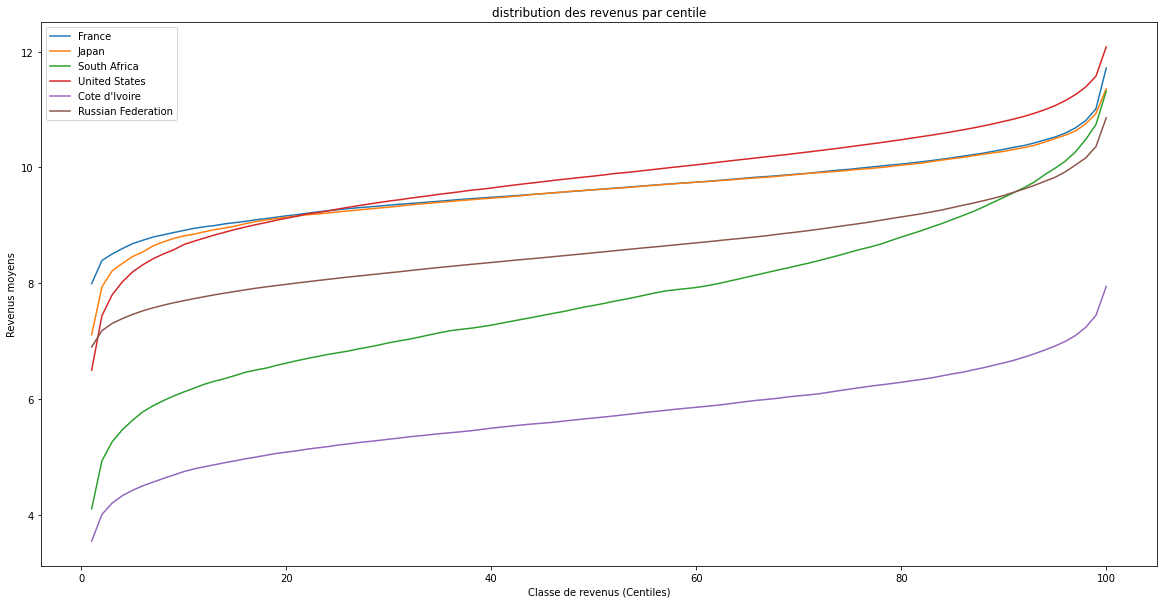

In [38]:
# implementation courbes illustrant la diversité des pays en termes de distribution de revenus
# liste of choosen countries
liste_pays =['France','Japan', 'South Africa',
                             'United States', "Cote d'Ivoire", 'Russian Federation']
# initialisation des graphiques
plt.figure(figsize=(20, 10))
# Creation des valeurs en abscisses correspondant aux 100 groupes/ centiles
x = np.arange(divers_pays['quantile'].min(), divers_pays['quantile'].max()+1, 1)
for i in range(0, len(liste_pays)): 
    y = divers_pays.loc[divers_pays['Country Name'] == liste_pays[i], 'income']
    plt.plot(x, np.log(y), label=liste_pays[i])
    
plt.xlabel('Classe de revenus (Centiles)')
plt.ylabel('Revenus moyens')
plt.title('distribution des revenus par centile')
plt.legend()
# Save the figure
plt.savefig('diversité_distribution.png')
# To load the display window
plt.show()


### Courbe de Lorentz

In [39]:
# initialisation des données
# en ordonnée (Z) et en abcisse (x)

for i in range(0, len(liste_pays)):
    y = divers_pays.loc[divers_pays['Country Name'] == liste_pays[i], 'income']
    z = y.cumsum() / y.sum()
    print(liste_pays[i], len(y), y)
    print(z*100)

France 100 3300      2958.3040
3301      4412.6753
3302      4939.6350
3303      5422.9165
3304      5906.5376
           ...     
3395     39873.5100
3396     43693.0350
3397     49489.5820
3398     60758.6130
3399    122775.1640
Name: income, Length: 100, dtype: float64
3300      0.161573
3301      0.402579
3302      0.672366
3303      0.968547
3304      1.291143
           ...    
3395     84.886655
3396     87.273026
3397     89.975985
3398     93.294422
3399    100.000000
Name: income, Length: 100, dtype: float64
Japan 100 5200     1224.3405
5201     2797.1710
5202     3689.0742
5203     4199.9080
5204     4726.7344
           ...    
5295    38494.8950
5296    41385.4380
5297    46803.4400
5298    55994.7600
5299    85569.3360
Name: income, Length: 100, dtype: float64
5200      0.070231
5201      0.230684
5202      0.442299
5203      0.683217
5204      0.954355
           ...    
5295     86.820772
5296     89.194748
5297     91.879515
5298     95.091520
5299    100.000000
Name: 

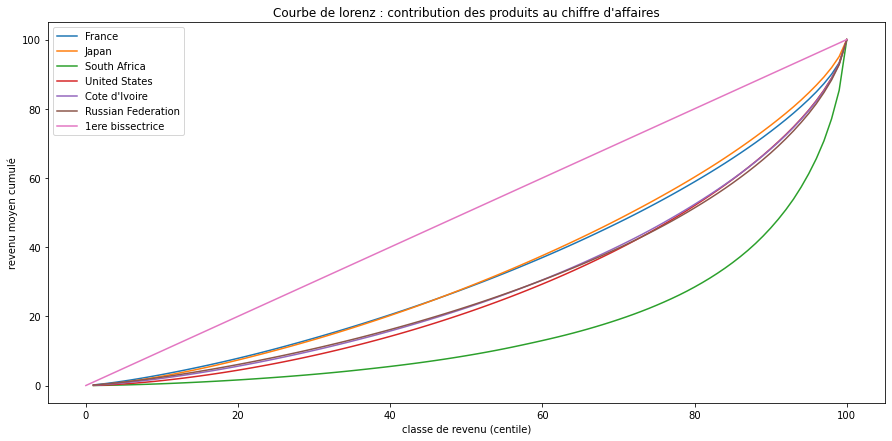

In [40]:
# tracer de la courbe de lorentz
# Y represente le revenu en pourcentage correspondant à chaque centile
plt.figure(figsize=(15, 7))
for i in range(0, len(liste_pays)):
    y = divers_pays.loc[divers_pays['Country Name'] == liste_pays[i], 'income']
    z = y.cumsum() / y.sum()
    plt.plot(x, 100*z, label=liste_pays[i])
    
plt.plot([0,100], [0,100],label= '1ere bissectrice')
plt.xlabel('classe de revenu (centile)')
plt.ylabel('revenu moyen cumulé')
plt.title("Courbe de lorenz : contribution des produits au chiffre d'affaires")
plt.legend()
plt.savefig('Courbe_de_Lorentz(repartition du revenu).png')
plt.show()


### Evolution de l'indice de Gini au fil des ans

In [41]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0


#### Calcul des index de Gini à partir des revenus par centiles pour chaque pays


In [42]:
liste_pays_all = merge_income_pop['country'].unique()
liste_pays_all

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

In [43]:
test = merge_income_pop.groupby(['country', 'quantile'])['income'].mean()
test

country  quantile
ALB      1             728.89795
         2             916.66235
         3            1010.91600
         4            1086.90780
         5            1132.69970
                        ...     
ZAF      96          24553.56800
         97          28858.03100
         98          35750.29000
         99          46297.31600
         100         82408.55000
Name: income, Length: 11599, dtype: float64

In [44]:
test[('ALB')].values

array([  728.89795,   916.66235,  1010.916  ,  1086.9078 ,  1132.6997 ,
        1171.1412 ,  1201.1324 ,  1240.8976 ,  1285.6914 ,  1325.2533 ,
        1351.3123 ,  1379.9443 ,  1416.7827 ,  1467.0759 ,  1503.6356 ,
        1535.6703 ,  1571.8933 ,  1604.8568 ,  1636.6593 ,  1669.9136 ,
        1709.7347 ,  1746.391  ,  1765.3282 ,  1789.8435 ,  1821.8538 ,
        1844.6742 ,  1863.2518 ,  1880.7145 ,  1903.7499 ,  1929.054  ,
        1950.4482 ,  1967.546  ,  1993.7744 ,  2026.2073 ,  2057.9592 ,
        2085.9587 ,  2115.247  ,  2141.773  ,  2170.2737 ,  2195.6135 ,
        2216.396  ,  2258.5613 ,  2291.3662 ,  2318.385  ,  2343.677  ,
        2367.7053 ,  2394.3325 ,  2414.1929 ,  2450.6875 ,  2493.837  ,
        2515.8542 ,  2545.9229 ,  2585.2053 ,  2624.496  ,  2653.148  ,
        2689.833  ,  2727.5537 ,  2760.3188 ,  2789.3022 ,  2820.4968 ,
        2853.7224 ,  2892.096  ,  2937.91   ,  2981.6497 ,  3007.7898 ,
        3061.0693 ,  3103.5266 ,  3146.2292 ,  3181.6255 ,  3230

In [45]:
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   2008            11599 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 996.8+ KB


In [46]:
merge_income_pop['country']

0        ALB
1        ALB
2        ALB
3        ALB
4        ALB
        ... 
11594    COD
11595    COD
11596    COD
11597    COD
11598    COD
Name: country, Length: 11599, dtype: object

In [47]:
# Calcul des indices de gini pour chaque pays

liste_pays_all  # liste de tous les pays dont on dispose du revenu par centile
this_dict = {}
for pays in liste_pays_all:
    df = merge_income_pop.groupby(['country', 'quantile'])['income'].mean()
    y = df[(pays)].values
    lorenz_income = y.cumsum() / y.sum()
    AUC = (lorenz_income.sum() -
           lorenz_income[-1]/2 - lorenz_income[0]/2) / len(y)
    S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S*100
    this_dict.update({pays: gini})

print(this_dict)

{'ALB': 30.46486297254154, 'ARG': 44.99059938407554, 'ARM': 26.31301397252934, 'AUT': 27.829689027428415, 'AZE': 31.23380455416579, 'BEL': 28.46115990306548, 'BFA': 39.76185474321884, 'BGD': 31.647136566785804, 'BGR': 36.192419727772986, 'BIH': 35.5560920247607, 'BLR': 26.61485037903908, 'BOL': 56.14765453335284, 'BRA': 54.44966800912642, 'BTN': 38.08323016021175, 'CAF': 56.17371798853017, 'CAN': 35.021928902263824, 'CHL': 53.15791538711101, 'CHN': 47.82662321957745, 'CIV': 41.49413646534767, 'CMR': 38.93846782089603, 'COL': 56.9272990032518, 'CRI': 49.253836679109774, 'CYP': 28.055035831112775, 'CZE': 25.28831670476106, 'DEU': 30.64774972369848, 'DNK': 25.988265524144527, 'DOM': 50.25305852087671, 'ECU': 50.988254532531755, 'EGY': 33.059168188704334, 'ESP': 30.742502027509033, 'EST': 30.071256017641158, 'FIN': 27.687710107460305, 'FJI': 42.82359582530455, 'FRA': 32.91123960499508, 'GBR': 33.93886093508362, 'GEO': 39.01024745546153, 'GHA': 42.75971542286307, 'GIN': 39.63137509540455, '

In [48]:
merge_income_pop['gini_index'] = [this_dict[pays] for pays in merge_income_pop['country']]
merge_income_pop.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.464863
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.464863
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.464863
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.464863
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.464863


In [49]:
merge_income_pop['gini_index'] = merge_income_pop['gini_index'].round()

In [50]:
merge_income_pop.head(2)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [51]:
merge_income_pop[merge_income_pop['country'] == 'FRA']

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008,gini_index
3300,FRA,2008,1,100,2958.3040,30357.0,France,FRA,"Population, total",64374979.0,33.0
3301,FRA,2008,2,100,4412.6753,30357.0,France,FRA,"Population, total",64374979.0,33.0
3302,FRA,2008,3,100,4939.6350,30357.0,France,FRA,"Population, total",64374979.0,33.0
3303,FRA,2008,4,100,5422.9165,30357.0,France,FRA,"Population, total",64374979.0,33.0
3304,FRA,2008,5,100,5906.5376,30357.0,France,FRA,"Population, total",64374979.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...
3395,FRA,2008,96,100,39873.5100,30357.0,France,FRA,"Population, total",64374979.0,33.0
3396,FRA,2008,97,100,43693.0350,30357.0,France,FRA,"Population, total",64374979.0,33.0
3397,FRA,2008,98,100,49489.5820,30357.0,France,FRA,"Population, total",64374979.0,33.0
3398,FRA,2008,99,100,60758.6130,30357.0,France,FRA,"Population, total",64374979.0,33.0


In [52]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


- Evolution au fil des ans de l'indice de gini

In [53]:
df_gini = pd.read_excel('gini_index.xls')
df_gini.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_unpivot_gini = df_gini.melt(id_vars=['Country Code', 'Country Name',
                     'Indicator Name', 'Indicator Code'], value_name= 'gini_value')
df_unpivot_gini

,Country Code,Country Name,Indicator Name,Indicator Code,variable,gini_value
0,ABW,Aruba,Gini index,SI.POV.GINI,1960,NaN
1,AFE,Africa Eastern and Southern,Gini index,SI.POV.GINI,1960,NaN
2,AFG,Afghanistan,Gini index,SI.POV.GINI,1960,NaN
3,AFW,Africa Western and Central,Gini index,SI.POV.GINI,1960,NaN
4,AGO,Angola,Gini index,SI.POV.GINI,1960,NaN
...,...,...,...,...,...,...
16487,XKX,Kosovo,Gini index,SI.POV.GINI,2021,NaN
16488,YEM,"Yemen, Rep.",Gini index,SI.POV.GINI,2021,NaN
16489,ZAF,South Africa,Gini index,SI.POV.GINI,2021,NaN
16490,ZMB,Zambia,Gini index,SI.POV.GINI,2021,NaN


In [55]:
df_unpivot_gini[df_unpivot_gini['Country Name'] == 'France'].head(50)

,Country Code,Country Name,Indicator Name,Indicator Code,variable,gini_value
77,FRA,France,Gini index,SI.POV.GINI,1960,NaN
343,FRA,France,Gini index,SI.POV.GINI,1961,NaN
609,FRA,France,Gini index,SI.POV.GINI,1962,NaN
875,FRA,France,Gini index,SI.POV.GINI,1963,NaN
1141,FRA,France,Gini index,SI.POV.GINI,1964,NaN
1407,FRA,France,Gini index,SI.POV.GINI,1965,NaN
1673,FRA,France,Gini index,SI.POV.GINI,1966,NaN
1939,FRA,France,Gini index,SI.POV.GINI,1967,NaN
2205,FRA,France,Gini index,SI.POV.GINI,1968,NaN
2471,FRA,France,Gini index,SI.POV.GINI,1969,NaN


limit_output extension: Maximum message size of 5000 exceeded with 9176 characters

In [56]:
df_evol_gini = df_unpivot_gini[df_unpivot_gini['Country Name'].isin(liste_pays)]
df_evol_gini

,Country Code,Country Name,Indicator Name,Indicator Code,variable,gini_value
41,CIV,Cote d'Ivoire,Gini index,SI.POV.GINI,1960,NaN
77,FRA,France,Gini index,SI.POV.GINI,1960,NaN
119,JPN,Japan,Gini index,SI.POV.GINI,1960,NaN
202,RUS,Russian Federation,Gini index,SI.POV.GINI,1960,NaN
251,USA,United States,Gini index,SI.POV.GINI,1960,NaN
...,...,...,...,...,...,...
16303,FRA,France,Gini index,SI.POV.GINI,2021,NaN
16345,JPN,Japan,Gini index,SI.POV.GINI,2021,NaN
16428,RUS,Russian Federation,Gini index,SI.POV.GINI,2021,NaN
16477,USA,United States,Gini index,SI.POV.GINI,2021,NaN


In [57]:
df_evol_gini = df_evol_gini.groupby(['Country Code', 'Country Name', 'variable' ])['gini_value'].mean().reset_index()
df_evol_gini

,Country Code,Country Name,variable,gini_value
0,CIV,Cote d'Ivoire,1960,NaN
1,CIV,Cote d'Ivoire,1961,NaN
2,CIV,Cote d'Ivoire,1962,NaN
3,CIV,Cote d'Ivoire,1963,NaN
4,CIV,Cote d'Ivoire,1964,NaN
...,...,...,...,...
367,ZAF,South Africa,2017,NaN
368,ZAF,South Africa,2018,NaN
369,ZAF,South Africa,2019,NaN
370,ZAF,South Africa,2020,NaN


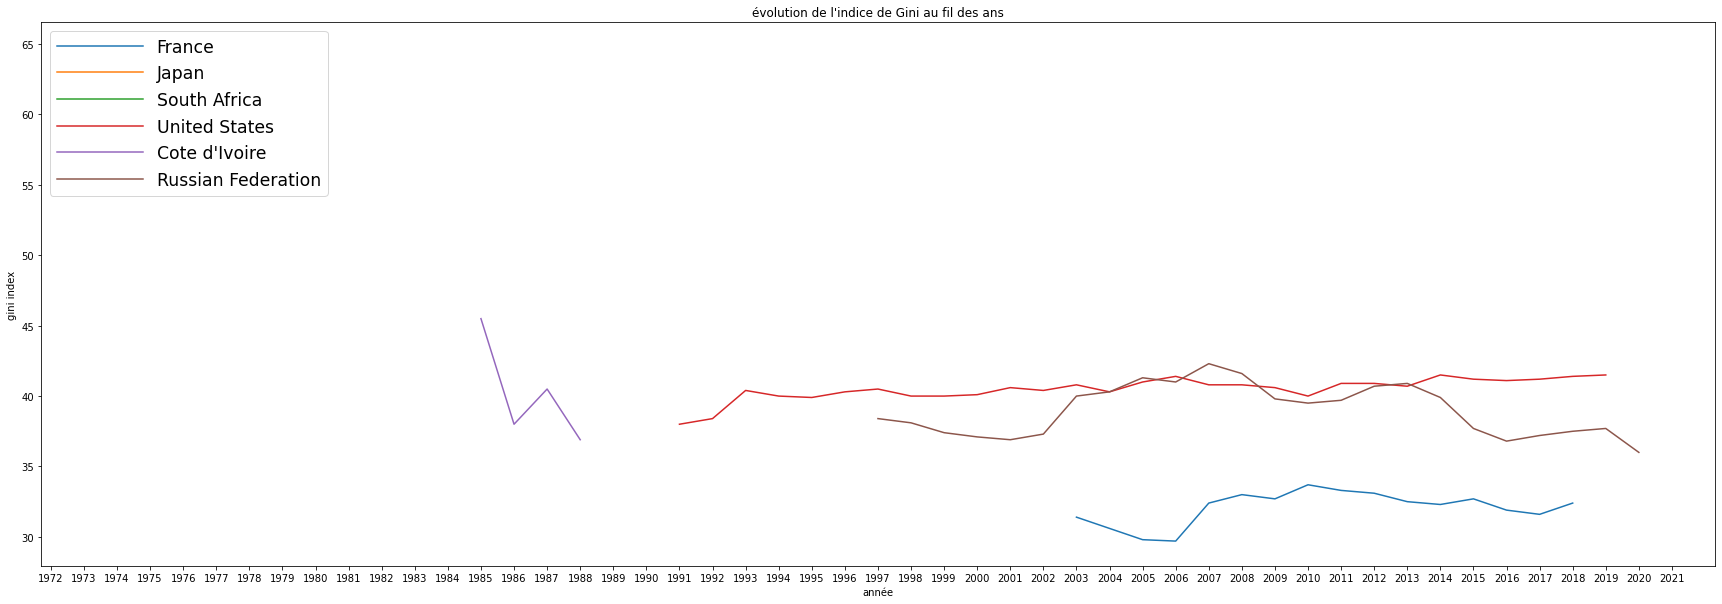

In [58]:
# graphique obtenue sans imputer les indices de gini

plt.figure(figsize=(30, 10))
for i in range(0, len(liste_pays)):
    y = df_evol_gini.loc[df_evol_gini['Country Name'] == liste_pays[i], 'gini_value']
    x = df_evol_gini['variable'].unique()
    plt.plot(x, y, label=liste_pays[i])
    
plt.xlabel('année')
plt.ylabel('gini index')
plt.title("évolution de l'indice de Gini au fil des ans")
plt.legend(handlelength=5, fontsize='xx-large')

In [59]:
liste_pays

['France',
 'Japan',
 'South Africa',
 'United States',
 "Cote d'Ivoire",
 'Russian Federation']

In [60]:
# En essayant d'imputer les indices de gini aux données manquantes

# indice de gini en 2008 connus (calculés)
df_gini_liste_pays = merge_income_pop[merge_income_pop['Country Name'].isin(liste_pays)][['country', 'Country Name', 'gini_index']].drop_duplicates()
df_gini_liste_pays

,country,Country Name,gini_index
1800,CIV,Cote d'Ivoire,41.0
3300,FRA,France,33.0
5200,JPN,Japan,32.0
9099,RUS,Russian Federation,42.0
10899,USA,United States,43.0
11399,ZAF,South Africa,67.0


In [61]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,2008,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [62]:
pd.options.display.max_rows = 372
df_evol_gini.head()

,Country Code,Country Name,variable,gini_value
0,CIV,Cote d'Ivoire,1960,NaN
1,CIV,Cote d'Ivoire,1961,NaN
2,CIV,Cote d'Ivoire,1962,NaN
3,CIV,Cote d'Ivoire,1963,NaN
4,CIV,Cote d'Ivoire,1964,NaN


In [63]:
df_evol_gini_fill = df_evol_gini.fillna(method='ffill')
df_evol_gini_fill.head()


,Country Code,Country Name,variable,gini_value
0,CIV,Cote d'Ivoire,1960,NaN
1,CIV,Cote d'Ivoire,1961,NaN
2,CIV,Cote d'Ivoire,1962,NaN
3,CIV,Cote d'Ivoire,1963,NaN
4,CIV,Cote d'Ivoire,1964,NaN


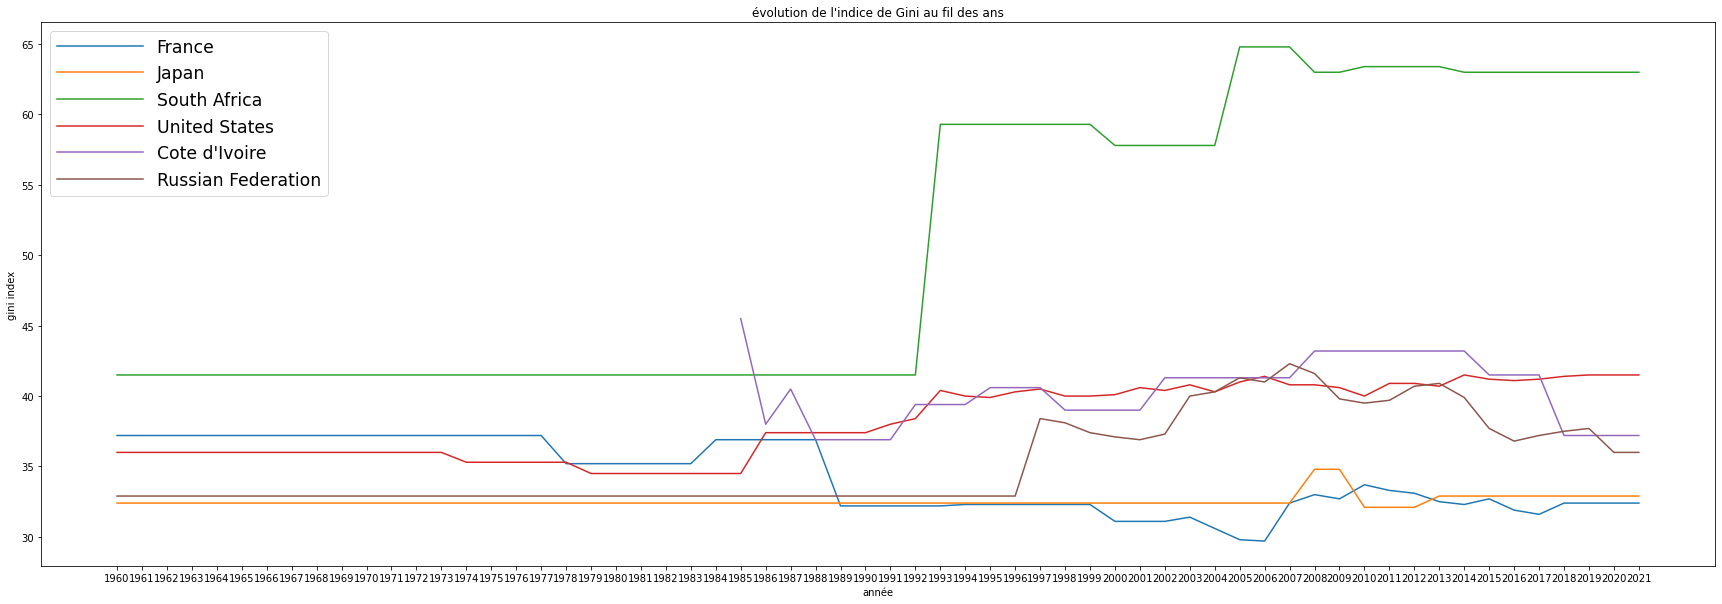

In [64]:
# graphique obtenue en imputant les indices de gini (method=ffill)

plt.figure(figsize=(30, 10))
for i in range(0, len(liste_pays)):
    y = df_evol_gini_fill.loc[df_evol_gini_fill['Country Name'] == liste_pays[i], 'gini_value']
    x = df_evol_gini['variable'].unique()
    plt.plot(x, y, label=liste_pays[i])
    
plt.xlabel('année')
plt.ylabel('gini index')
plt.title("évolution de l'indice de Gini au fil des ans")
plt.legend(handlelength=5, fontsize='xx-large')
plt.savefig('evolution_indice_gini.png')
plt.show()

### Classement des pays par indice de Gini

In [65]:
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   2008            11599 non-null  float64
 10  gini_index      11599 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [66]:
# Check the data types before sorting the dataFrame
# and rename columns '2008'
merge_income_pop.rename(columns={'2008': 'population'}, inplace=True)
merge_income_pop.dtypes

country            object
year_survey         int64
quantile            int64
nb_quantiles        int64
income            float64
gdpppp            float64
Country Name       object
Country Code       object
Indicator Name     object
population        float64
gini_index        float64
dtype: object

In [67]:
# supprimmons les lignes dupliquées des pays
df_rank = merge_income_pop.drop_duplicates('Country Name')

In [68]:
#Classement des pays par indice de gini
# Classement du plus inegalitaire au moins inegalitaire
df_rank['gini_rank'] = df_rank['gini_index'].rank(ascending=False)
df_rank.head()

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_1680/899653067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank['gini_rank'] = df_rank['gini_index'].rank(ascending=False)


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index,gini_rank
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,93.5
100,ARG,2008,1,100,254.08942,13220.0,Argentina,ARG,"Population, total",40080159.0,45.0,25.5
200,ARM,2008,1,100,366.61780,5611.0,Armenia,ARM,"Population, total",2907615.0,26.0,110.5
300,AUT,2008,1,100,2958.07640,36193.0,Austria,AUT,"Population, total",8321496.0,28.0,103.0
400,AZE,2008,1,100,397.53983,8101.0,Azerbaijan,AZE,"Population, total",8763400.0,31.0,86.5


In [299]:
#Top 5 des pays les plus égalitaires
df_rank.sort_values(by='gini_index').head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index,gini_rank
9599,SVN,2008,1,100,2814.95300,27197.0,Slovenia,SVN,"Population, total",2021316.0,23.0,116.0
9699,SWE,2008,1,100,2284.43290,34371.0,Sweden,SWE,"Population, total",9219637.0,25.0,114.0
9499,SVK,2008,1,100,791.46204,20515.0,Slovak Republic,SVK,"Population, total",5379233.0,25.0,114.0
2300,CZE,2008,1,100,1586.24710,23223.0,Czech Republic,CZE,"Population, total",10384603.0,25.0,114.0
10699,UKR,2008,1,100,942.38495,6721.0,Ukraine,UKR,"Population, total",46258189.0,26.0,110.5


In [300]:
#Top 5 des pays les plus égalitaires
df_rank.sort_values(by='gini_index', ascending=False)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index,gini_rank
11399,ZAF,2008,1,100,60.490383,9.602000e+03,South Africa,ZAF,"Population, total",4.977947e+07,67.0,1.0
4000,HND,2008,1,100,50.166843,3.628000e+03,Honduras,HND,"Population, total",7.980955e+06,60.0,2.0
3900,GTM,2011,1,100,38.463615,4.367000e+03,Guatemala,GTM,"Population, total",1.373930e+07,57.0,3.5
2000,COL,2008,1,100,62.605060,8.185000e+03,Colombia,COL,"Population, total",4.425497e+07,57.0,3.5
1400,CAF,2008,1,100,40.928130,6.850000e+02,Central African Republic,CAF,"Population, total",4.273368e+06,56.0,5.5
1100,BOL,2008,1,100,20.584948,3.950000e+03,Bolivia,BOL,"Population, total",9.721457e+06,56.0,5.5
1200,BRA,2008,1,100,144.028460,9.559000e+03,Brazil,BRA,"Population, total",1.920304e+08,54.0,7.0
1600,CHL,2009,1,100,231.630040,1.339000e+04,Chile,CHL,"Population, total",1.670826e+07,53.0,9.0
8399,PAN,2009,1,100,210.568830,1.176700e+04,Panama,PAN,"Population, total",3.516204e+06,53.0,9.0
8899,PRY,2008,1,100,114.117410,4.347000e+03,Paraguay,PRY,"Population, total",6.081296e+06,53.0,9.0


limit_output extension: Maximum message size of 5000 exceeded with 36948 characters

In [69]:
# La moyenne des 5 pays ayant l'indice de gini le plus élevé
# classement des indices de gini, du pays le plus egalitaire au moins egalitaire

mean_gini_up5 = df_rank.sort_values('gini_rank', ascending=False).head(5)['gini_index'].mean()
mean_gini_up5

24.8

In [70]:
# La moyenne des 5 pays ayant l'indice de gini le plus faible
# classement des indices de gini, du pays le moins egalitaire au plus egalitaire

mean_gini_bottom5 = df_rank.sort_values('gini_rank').head(5)['gini_index'].mean()
mean_gini_bottom5

59.4

In [71]:
# la position de la France
position_France = df_rank.loc[df_rank['Country Name'] == 'France', 'gini_rank']
position_France

3300    75.0
Name: gini_rank, dtype: float64

In [72]:
print(f"La France est le {position_France[3300]:.0f}e pays le plus inégalitaires au monde (sur {len(df_rank)} pays)"
     )

La France est le 75e pays le plus inégalitaires au monde (sur 116 pays)


### Mission 3 

- Creation du main_df contenant les variables indispensables non nulles 

Travaux préliminaire:
- Constitution de la base de données principales
- Import des librairies nécessaires

In [73]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [74]:
# On a bien dans ce dataFrame:
# - Tous les revenus moyen du pays par centile
# - Tous les indices de Gini
# Il nous reste donc à trouver le revenu des parents (leur classe)

merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


1. Générere n réalisations de la variable ln_Y_parent

In [75]:
# import des données sur l'elasticité
df_elasticite = pd.read_csv('IGE_income_coef_elasticite.csv', sep=',',
                            usecols=['countryname', 'wbcode', 'iso3',
                                    'region', 'incgroup2', 'incgroup4',
                                    'year', 'IGEincome'])
df_elasticite.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN


In [76]:
df_elasticite[df_elasticite['IGEincome'].notna()].head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
61,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
62,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
63,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
64,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874


In [77]:
# On dispose des données de 75 pays (sur 116) concernant les coefficient d(elasticité)
df_elasticite[df_elasticite['IGEincome'].notna()]['countryname'].nunique()


75

In [78]:
# Verifions que les coefficients d'elasticité sont uniques pour chaque pays
# (limite = Sauf si deux pays on le même coeff d'elasticité)
df_elasticite[df_elasticite['IGEincome'].notna()]['IGEincome'].nunique()

75

In [79]:
#Pays dont on dispose des coefficients d'elasticité
array_country_to_drop = df_elasticite[df_elasticite['IGEincome'].notna()]['countryname'].unique()
array_country_to_drop

array(['Albania', 'Australia', 'Austria', 'Belgium', 'Benin',
       'Bangladesh', 'Bosnia and Herzegovina', 'Belarus', 'Bolivia',
       'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Ethiopia', 'Finland', 'France',
       'United Kingdom', 'Ghana', 'Guinea', 'Greece', 'Guatemala',
       'Croatia', 'India', 'Ireland', 'Italy', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Korea, Rep.',
       'Luxembourg', 'Latvia', 'Morocco', 'Madagascar', 'Macedonia, FYR',
       'Mali', 'Mongolia', 'Malawi', 'Malaysia', 'Nigeria', 'Netherlands',
       'Norway', 'Nepal', 'New Zealand', 'Pakistan', 'Panama', 'Peru',
       'Portugal', 'Romania', 'Russian Federation', 'Rwanda', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Timor-Leste', 'Tunisia',
       'Taiwan, China', 'Tanzania', 'Uganda', 'United States',
       'Uzbekistan', 'Vietnam',

In [80]:
df_elasticite_notna = df_elasticite[df_elasticite['IGEincome'].notna()].drop_duplicates()
df_elasticite_notna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
183,Australia,AUS,AUS,High income,High-income economies,High income,1960,0.275000
243,Austria,AUT,AUT,High income,High-income economies,High income,1960,0.245267
351,Belgium,BEL,BEL,High income,High-income economies,High income,1960,0.183176
405,Benin,BEN,BEN,Sub-Saharan Africa,Developing economies,Low income,1970,0.855116


In [81]:
df_elasticite_notna.shape

(75, 8)

In [82]:
# Import des données sur les coeffs d'elasticité par region
table = pd.read_table('elasticity copy.txt', sep='|')
table

,,Base case,Optimistic,Pessimistic
0,,,(high mobility),(low mobility)
1,----------------------------------------------...,NaN,NaN,NaN
2,Nordic European countries,0.2,0.15,0.3
3,and Canada,,,NaN
4,----------------------------------------------...,NaN,NaN,NaN
5,Europe (except nordic,0.4,0.3,0.5
6,countries),,,NaN
7,----------------------------------------------...,NaN,NaN,NaN
8,Australia/New Zealand/USA,0.4,0.3,0.5
9,----------------------------------------------...,NaN,NaN,NaN


In [83]:
table.dropna(inplace=True)
table

,,Base case,Optimistic,Pessimistic
0,,,(high mobility),(low mobility)
2,Nordic European countries,0.2,0.15,0.3
5,Europe (except nordic,0.4,0.3,0.5
8,Australia/New Zealand/USA,0.4,0.3,0.5
10,Asia,0.5,0.4,0.6
12,Latin America/Africa,0.66,0.5,0.9


In [84]:
table.reset_index(drop=True, inplace=True)
table

,,Base case,Optimistic,Pessimistic
0,,,(high mobility),(low mobility)
1,Nordic European countries,0.2,0.15,0.3
2,Europe (except nordic,0.4,0.3,0.5
3,Australia/New Zealand/USA,0.4,0.3,0.5
4,Asia,0.5,0.4,0.6
5,Latin America/Africa,0.66,0.5,0.9


In [85]:
table.columns

Index(['                          ', ' Base case  ', ' Optimistic     ',
       ' Pessimistic'],
      dtype='object')

In [86]:
table.rename(columns={'                          ': 'World region', ' Base case  ': 'Base', ' Optimistic     ': 'Optimistic(high mobility)',
                     ' Pessimistic': 'Pessimistic(low mobility)'},
            inplace=True, errors='raise')

In [87]:
# table donnant les coefficients d'élasticité par region

table.drop(index=0, inplace=True)
table

,World region,Base,Optimistic(high mobility),Pessimistic(low mobility)
1,Nordic European countries,0.2,0.15,0.3
2,Europe (except nordic,0.4,0.3,0.5
3,Australia/New Zealand/USA,0.4,0.3,0.5
4,Asia,0.5,0.4,0.6
5,Latin America/Africa,0.66,0.5,0.9


In [88]:
df_elasticite_notna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
183,Australia,AUS,AUS,High income,High-income economies,High income,1960,0.275000
243,Austria,AUT,AUT,High income,High-income economies,High income,1960,0.245267
351,Belgium,BEL,BEL,High income,High-income economies,High income,1960,0.183176
405,Benin,BEN,BEN,Sub-Saharan Africa,Developing economies,Low income,1970,0.855116


In [89]:
# pays dont on ne dispose pas des coefficients d'elasticité dans la base de la banque mondiale
df_elasticite_isna = df_elasticite[~df_elasticite['countryname'].isin(array_country_to_drop)]
df_elasticite_isna.head()


,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN


In [90]:
# suppression des lignes en doublons des pays (pour réduire la base de donnée)
df_elasticite_isna.drop_duplicates('countryname', inplace=True)

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_1680/3181916960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elasticite_isna.drop_duplicates('countryname', inplace=True)


In [91]:
# nombre de pays/regions présent dans la base dont on ne dispose pas des coeff. d'elasticité (pj)
df_elasticite_isna.drop_duplicates('countryname').shape

(75, 8)

In [92]:
# Regions associés au pays dans la base (Pj inconnu)
# A un pays on pourra associé le Pj moyen associé à la region associée
df_elasticite_isna['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
       'Europe & Central Asia', 'Middle East & North Africa',
       'High income', 'East Asia & Pacific'], dtype=object)

In [93]:
df_metada = pd.read_csv('Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_4150705.csv')
df_metada.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [94]:
df_elasticite_isna.head(2)

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
12,Angola,AGO,AGO,Sub-Saharan Africa,Developing economies,Upper middle income,1980,NaN


In [95]:
# exemple :pays de la région  d'Asie du sud à coeff d'elasticité absent
df_elasticite_isna[df_elasticite_isna['region']=='South Asia']


,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,NaN
742,Bhutan,BTN,BTN,South Asia,Developing economies,Lower middle income,1940,NaN
3428,Sri Lanka,LKA,LKA,South Asia,Developing economies,Lower middle income,1940,NaN
3797,Maldives,MDV,MDV,South Asia,Developing economies,Upper middle income,1980,NaN


In [96]:
df_elasticite_isna[df_elasticite_isna['region']=='South Asia']['IGEincome']

0      NaN
742    NaN
3428   NaN
3797   NaN
Name: IGEincome, dtype: float64

In [97]:
df_elasticite_isna.loc[df_elasticite_isna['region']=='South Asia', 'region']


0       South Asia
742     South Asia
3428    South Asia
3797    South Asia
Name: region, dtype: object

In [98]:
# On recueille l'ensemble des régions dans une liste
list_region = df_elasticite_isna['region'].unique()
list_region

array(['South Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
       'Europe & Central Asia', 'Middle East & North Africa',
       'High income', 'East Asia & Pacific'], dtype=object)

In [99]:
for zone_geo in list_region:
    serie_region = df_elasticite_isna.loc[df_elasticite_isna['region']== zone_geo, 'region']
    print(serie_region.unique()[0])
    print(type(serie_region.unique()[0]))
    print(len(serie_region))

South Asia
<class 'str'>
4
Sub-Saharan Africa
<class 'str'>
27
Latin America & Caribbean
<class 'str'>
9
Europe & Central Asia
<class 'str'>
11
Middle East & North Africa
<class 'str'>
6
High income
<class 'str'>
7
East Asia & Pacific
<class 'str'>
11


In [100]:
serie_region.unique()

array(['East Asia & Pacific'], dtype=object)

In [101]:

for i in list_region:
    serie_region = df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'region']
    if serie_region.unique()[0] == 'South Asia' or serie_region.unique()[0] == 'East Asia & Pacific':
        df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'IGEincome'] = 0.5
        print(serie_region)
        print(df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'IGEincome'])
    elif serie_region.unique()[0] == 'Sub-Saharan Africa' or serie_region.unique()[0] == 'Latin America & Caribbean' or serie_region.unique()[0] == 'Middle East & North Africa':
        df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'IGEincome'] = 0.66
    elif serie_region.unique()[0] == 'Europe & Central Asia':
        df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'IGEincome'] = 0.4
    elif serie_region.unique()[0] == 'High income':
        df_elasticite_isna.loc[df_elasticite_isna['region']== i, 'IGEincome'] = 0.4
    else:
        pass


0       South Asia
742     South Asia
3428    South Asia
3797    South Asia
Name: region, dtype: object
0       0.5
742     0.5
3428    0.5
3797    0.5
Name: IGEincome, dtype: float64
1872    East Asia & Pacific
2463    East Asia & Pacific
3164    East Asia & Pacific
3176    East Asia & Pacific
3308    East Asia & Pacific
4838    East Asia & Pacific
4898    East Asia & Pacific
5671    East Asia & Pacific
5795    East Asia & Pacific
5919    East Asia & Pacific
6366    East Asia & Pacific
Name: region, dtype: object
1872    0.5
2463    0.5
3164    0.5
3176    0.5
3308    0.5
4838    0.5
4898    0.5
5671    0.5
5795    0.5
5919    0.5
6366    0.5
Name: IGEincome, dtype: float64


/Users/michelabessolo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [102]:
# les données sont bien renseignés sur la colonne IGEincome
df_elasticite_isna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,0.50
12,Angola,AGO,AGO,Sub-Saharan Africa,Developing economies,Upper middle income,1980,0.66
84,Argentina,ARG,ARG,Latin America & Caribbean,Developing economies,Upper middle income,1940,0.66
99,Armenia,ARM,ARM,Europe & Central Asia,Developing economies,Lower middle income,1940,0.40
279,Azerbaijan,AZE,AZE,Europe & Central Asia,Developing economies,Upper middle income,1950,0.40


On dispose maintenant de deux base de données contenant les Pj(elasticités):
- df_elasticite_isna et df_elasticite_notna que nous allons concatener...


In [103]:
df_elasticite_isna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1980,0.50
12,Angola,AGO,AGO,Sub-Saharan Africa,Developing economies,Upper middle income,1980,0.66
84,Argentina,ARG,ARG,Latin America & Caribbean,Developing economies,Upper middle income,1940,0.66
99,Armenia,ARM,ARM,Europe & Central Asia,Developing economies,Lower middle income,1940,0.40
279,Azerbaijan,AZE,AZE,Europe & Central Asia,Developing economies,Upper middle income,1950,0.40


In [104]:
df_elasticite_notna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.815874
183,Australia,AUS,AUS,High income,High-income economies,High income,1960,0.275000
243,Austria,AUT,AUT,High income,High-income economies,High income,1960,0.245267
351,Belgium,BEL,BEL,High income,High-income economies,High income,1960,0.183176
405,Benin,BEN,BEN,Sub-Saharan Africa,Developing economies,Low income,1970,0.855116


In [105]:
df_elasticite_notna['IGEincome'] = df_elasticite_notna['IGEincome'].round(decimals=2)
df_elasticite_notna.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.82
183,Australia,AUS,AUS,High income,High-income economies,High income,1960,0.28
243,Austria,AUT,AUT,High income,High-income economies,High income,1960,0.25
351,Belgium,BEL,BEL,High income,High-income economies,High income,1960,0.18
405,Benin,BEN,BEN,Sub-Saharan Africa,Developing economies,Low income,1970,0.86


In [106]:
# Consolidation dans une seule base, des données sur l'elasticité (pj)
df_elast = pd.concat([df_elasticite_notna, df_elasticite_isna])
df_elast

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.82
183,Australia,AUS,AUS,High income,High-income economies,High income,1960,0.28
243,Austria,AUT,AUT,High income,High-income economies,High income,1960,0.25
351,Belgium,BEL,BEL,High income,High-income economies,High income,1960,0.18
405,Benin,BEN,BEN,Sub-Saharan Africa,Developing economies,Low income,1970,0.86
429,Bangladesh,BGD,BGD,South Asia,Developing economies,Lower middle income,1960,0.54
538,Bosnia and Herzegovina,BIH,BIH,Europe & Central Asia,Developing economies,Upper middle income,1970,0.83
598,Belarus,BLR,BLR,Europe & Central Asia,Developing economies,Upper middle income,1970,0.34
658,Bolivia,BOL,BOL,Latin America & Caribbean,Developing economies,Lower middle income,1970,0.87
706,Brazil,BRA,BRA,Latin America & Caribbean,Developing economies,Upper middle income,1960,0.64


limit_output extension: Maximum message size of 5000 exceeded with 37235 characters

In [107]:
# On a bien récuperer toutes les valeurs des pj des pays
df_elast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 60 to 6492
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countryname  150 non-null    object 
 1   wbcode       150 non-null    object 
 2   iso3         150 non-null    object 
 3   region       150 non-null    object 
 4   incgroup2    150 non-null    object 
 5   incgroup4    150 non-null    object 
 6   year         150 non-null    int64  
 7   IGEincome    150 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 10.5+ KB


In [108]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [109]:
# des données sont manquantes :
# - le gdpppp
# - Country Name
# - Country Code
# - Indicator Name
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11399 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [110]:
# imputons les gdpppp (gross domestic product) manquants
gdp_df = merge_income_pop[merge_income_pop['gdpppp'].isna()]
gdp_df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
5800,XKX,2008,1,100,437.89370,NaN,Kosovo,XKX,"Population, total",1747383.0,31.0
5801,XKX,2008,2,100,508.17133,NaN,Kosovo,XKX,"Population, total",1747383.0,31.0
5802,XKX,2008,3,100,591.82820,NaN,Kosovo,XKX,"Population, total",1747383.0,31.0
5803,XKX,2008,4,100,668.00000,NaN,Kosovo,XKX,"Population, total",1747383.0,31.0
5804,XKX,2008,5,100,730.40220,NaN,Kosovo,XKX,"Population, total",1747383.0,31.0


In [111]:
# Pays dont il manque le gdpppp en 2008
merge_income_pop[merge_income_pop['gdpppp'].isna()]['Country Name'].unique()

array(['Kosovo', 'West Bank and Gaza'], dtype=object)

source: https://data.worldbank.org/ :
- gdp ppp Kosovo : 7249.512 
- gdp ppp West Bank and Gaza : 3708.66


In [112]:
gdp_df.loc[gdp_df['Country Name'] == 'Kosovo', 'Country Name'].unique()

array(['Kosovo'], dtype=object)

In [113]:
gdp_df.loc[gdp_df['Country Name'] == 'Kosovo', 'Country Name'].unique() == 'Kosovo'


array([ True])

In [114]:
gdp_df.loc[gdp_df['Country Name'] == 'Kosovo', 'gdpppp'] =  7249.512
gdp_df.loc[gdp_df['Country Name'] == 'West Bank and Gaza', 'gdpppp'] = 3708.66
gdp_df.head()

/Users/michelabessolo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
5800,XKX,2008,1,100,437.89370,7249.512,Kosovo,XKX,"Population, total",1747383.0,31.0
5801,XKX,2008,2,100,508.17133,7249.512,Kosovo,XKX,"Population, total",1747383.0,31.0
5802,XKX,2008,3,100,591.82820,7249.512,Kosovo,XKX,"Population, total",1747383.0,31.0
5803,XKX,2008,4,100,668.00000,7249.512,Kosovo,XKX,"Population, total",1747383.0,31.0
5804,XKX,2008,5,100,730.40220,7249.512,Kosovo,XKX,"Population, total",1747383.0,31.0


In [115]:
merge_income_pop.loc[merge_income_pop['Country Name'] == 'Kosovo', 'gdpppp'] =  7249.512
merge_income_pop.loc[merge_income_pop['Country Name'] == 'West Bank and Gaza', 'gdpppp'] = 3708.66
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [116]:
# les données sont complètes au sujet du gdpppp
# Analysons les autres données manquantes
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11599 non-null  float64
 6   Country Name    11499 non-null  object 
 7   Country Code    11499 non-null  object 
 8   Indicator Name  11499 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [117]:
merge_income_pop.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [118]:
# Il s'agit de Taiwan
merge_income_pop[merge_income_pop['Country Name'].isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
10399,TWN,2008,1,100,3477.1800,25342.0,NaN,NaN,NaN,23019045.0,31.0
10400,TWN,2008,2,100,4740.2637,25342.0,NaN,NaN,NaN,23019045.0,31.0
10401,TWN,2008,3,100,5331.3013,25342.0,NaN,NaN,NaN,23019045.0,31.0
10402,TWN,2008,4,100,5761.6577,25342.0,NaN,NaN,NaN,23019045.0,31.0
10403,TWN,2008,5,100,6093.2017,25342.0,NaN,NaN,NaN,23019045.0,31.0
10404,TWN,2008,6,100,6406.4414,25342.0,NaN,NaN,NaN,23019045.0,31.0
10405,TWN,2008,7,100,6659.2026,25342.0,NaN,NaN,NaN,23019045.0,31.0
10406,TWN,2008,8,100,6918.4180,25342.0,NaN,NaN,NaN,23019045.0,31.0
10407,TWN,2008,9,100,7112.2593,25342.0,NaN,NaN,NaN,23019045.0,31.0
10408,TWN,2008,10,100,7308.3813,25342.0,NaN,NaN,NaN,23019045.0,31.0


limit_output extension: Maximum message size of 5000 exceeded with 27440 characters

In [119]:
merge_income_pop.loc[merge_income_pop['country'] == 'TWN', 'Country Name'] = 'Taiwan'
merge_income_pop.loc[merge_income_pop['country'] == 'TWN', 'Country Code'] = 'TWN'
merge_income_pop.loc[merge_income_pop['country'] == 'TWN', 'Indicator Name'] = 'Population, total'


In [120]:
merge_income_pop[merge_income_pop['Indicator Name'].isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index


In [121]:
# Il n'existe plus de valeurs manquantes dans notre base de données
merge_income_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11599 non-null  float64
 6   Country Name    11599 non-null  object 
 7   Country Code    11599 non-null  object 
 8   Indicator Name  11599 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [122]:
merge_income_pop.head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0


In [123]:
df_elast.head(1)

,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
60,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970,0.82


In [124]:
# ajout des infos sur les pj sur le dataFrame principal
df_main = merge_income_pop.merge(df_elast, how='left', left_on='Country Name',
                      right_on='countryname')
df_main.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,Indicator Name,population,gini_index,countryname,wbcode,iso3,region,incgroup2,incgroup4,year,IGEincome
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970.0,0.82
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970.0,0.82
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970.0,0.82
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970.0,0.82
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,"Population, total",2947314.0,30.0,Albania,ALB,ALB,Europe & Central Asia,Developing economies,Upper middle income,1970.0,0.82


In [125]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11599 non-null  float64
 6   Country Name    11599 non-null  object 
 7   Country Code    11599 non-null  object 
 8   Indicator Name  11599 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
 11  countryname     11199 non-null  object 
 12  wbcode          11199 non-null  object 
 13  iso3            11199 non-null  object 
 14  region          11199 non-null  object 
 15  incgroup2       11199 non-null  object 
 16  incgroup4       11199 non-null  object 
 17  year            11199 non-null 

In [126]:
# données manquantes après le merge
df_main[df_main['countryname'].isna()]

country  year_survey  quantile  nb_quantiles       income   gdpppp  \
6899      MKD         2008         1           100    559.17960   8809.0   
6900      MKD         2008         2           100    812.29010   8809.0   
6901      MKD         2008         3           100    902.52563   8809.0   
6902      MKD         2008         4           100    964.23300   8809.0   
6903      MKD         2008         5           100   1092.77380   8809.0   
...       ...          ...       ...           ...          ...      ...   
10494     TWN         2008        96           100  38123.46000  25342.0   
10495     TWN         2008        97           100  41663.79000  25342.0   
10496     TWN         2008        98           100  46650.58200  25342.0   
10497     TWN         2008        99           100  54016.99200  25342.0   
10498     TWN         2008       100           100  83540.05500  25342.0   

          Country Name Country Code     Indicator Name  population  \
6899   North Macedonia          MKD  Population, total   2046898.0   
6900   North Macedonia          MKD  Population, total   2046898.0   
6901   North Macedonia          MKD  Population, total   2046898.0   
6902   North Macedonia          MKD  Population, total   2046898.0   
6903   North Macedonia          MKD  Population, total   2046898.0   
...                ...          ...                ...         ...   
10494           Taiwan          TWN  Population, total  23019045.0   
10495           Taiwan          TWN  Population, total  23019045.0   
10496           Taiwan          TWN  Population, total  23019045.0   
10497           Taiwan          TWN  Population, total  23019045.0   
10498           Taiwan          TWN  Population, total  23019045.0   

       gini_index countryname wbcode iso3 region incgroup2 incgroup4  year  \
6899         40.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
6900         40.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
6901         40.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
6902         40.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
6903         40.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
...           ...         ...    ...  ...    ...       ...       ...   ...   
10494        31.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
10495        31.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
10496        31.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
10497        31.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   
10498        31.0         NaN    NaN  NaN    NaN       NaN       NaN   NaN   

       IGEincome  
6899         NaN  
6900         NaN  
6901         NaN  
6902         NaN  
6903         NaN  
...          ...  
10494        NaN  
10495        NaN  
10496        NaN  
10497        NaN  
10498        NaN  

[400 rows x 19 columns]

limit_output extension: Maximum message size of 5000 exceeded with 5686 characters

In [127]:
# On pourra imputer à ces pays des pj en fonction des régions d'appartenance
df_main[df_main['countryname'].isna()]['Country Name'].unique()


array(['North Macedonia', 'Eswatini', 'Syrian Arab Republic', 'Taiwan'],
      dtype=object)

In [128]:
# on associe à la macedoine du nord le pj= 0.4 correspondant à l'europe
df_main.loc[df_main['Country Name'] == 'North Macedonia', 'IGEincome'] = 0.4

#  on associe à l'Eswatini le coeff 0.66 correspondant à l'Afrique
df_main.loc[df_main['Country Name'] == 'Eswatini', 'IGEincome'] = 0.66

#  on associe à Taiwan  et à la Syrie le coeff 0.5 correspondant à l'Asie
df_main.loc[(df_main['Country Name'] == 'Syrian Arab Republic')
            | (df_main['Country Name'] == 'Taiwan'), 'IGEincome'] = 0.5



In [129]:
table

,World region,Base,Optimistic(high mobility),Pessimistic(low mobility)
1,Nordic European countries,0.2,0.15,0.3
2,Europe (except nordic,0.4,0.3,0.5
3,Australia/New Zealand/USA,0.4,0.3,0.5
4,Asia,0.5,0.4,0.6
5,Latin America/Africa,0.66,0.5,0.9


In [130]:
# L'ensemble des données nécessaires sont bel et bien présentes
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11599 non-null  object 
 1   year_survey     11599 non-null  int64  
 2   quantile        11599 non-null  int64  
 3   nb_quantiles    11599 non-null  int64  
 4   income          11599 non-null  float64
 5   gdpppp          11599 non-null  float64
 6   Country Name    11599 non-null  object 
 7   Country Code    11599 non-null  object 
 8   Indicator Name  11599 non-null  object 
 9   population      11599 non-null  float64
 10  gini_index      11599 non-null  float64
 11  countryname     11199 non-null  object 
 12  wbcode          11199 non-null  object 
 13  iso3            11199 non-null  object 
 14  region          11199 non-null  object 
 15  incgroup2       11199 non-null  object 
 16  incgroup4       11199 non-null  object 
 17  year            11199 non-null 

In [131]:
df_main = df_main[['Country Name', 'Country Code', 'year_survey', 'quantile', 'nb_quantiles',
           'income', 'gdpppp', 'gini_index', 'IGEincome', 'population']]
df_main


,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,IGEincome,population
0,Albania,ALB,2008,1,100,728.89795,7297.00000,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.00000,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.00000,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.00000,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.00000,30.0,0.82,2947314.0
...,...,...,...,...,...,...,...,...,...,...
11594,"Congo, Dem. Rep.",COD,2008,96,100,810.62330,303.19305,44.0,0.71,60411195.0
11595,"Congo, Dem. Rep.",COD,2008,97,100,911.78340,303.19305,44.0,0.71,60411195.0
11596,"Congo, Dem. Rep.",COD,2008,98,100,1057.80740,303.19305,44.0,0.71,60411195.0
11597,"Congo, Dem. Rep.",COD,2008,99,100,1286.60290,303.19305,44.0,0.71,60411195.0


In [132]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11599 non-null  object 
 1   Country Code  11599 non-null  object 
 2   year_survey   11599 non-null  int64  
 3   quantile      11599 non-null  int64  
 4   nb_quantiles  11599 non-null  int64  
 5   income        11599 non-null  float64
 6   gdpppp        11599 non-null  float64
 7   gini_index    11599 non-null  float64
 8   IGEincome     11599 non-null  float64
 9   population    11599 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 996.8+ KB


In [133]:
df_main.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,IGEincome,population
0,Albania,ALB,2008,1,100,728.89795,7297.0,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.0,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.0,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.0,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.0,30.0,0.82,2947314.0


#### Generons n revenus des parents selon une loie normale

##### Q1/ n > (1000 * nb_quantiles)

In [134]:
df_main.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,IGEincome,population
0,Albania,ALB,2008,1,100,728.89795,7297.0,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.0,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.0,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.0,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.0,30.0,0.82,2947314.0


In [135]:
df_main.rename(columns={'IGEincome': 'pj'}, inplace=True)
df_main.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
0,Albania,ALB,2008,1,100,728.89795,7297.0,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.0,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.0,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.0,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.0,30.0,0.82,2947314.0


In [136]:
import scipy.stats as st
from collections import Counter

In [137]:
# Exemple pris pour un seul pays
nb_quantiles = 100
n = 1000 * nb_quantiles
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
ln_y_parent = st.norm(0,1).rvs(size=n)
    
print(ln_y_parent, len(ln_y_parent)) # cette ligne est a supp. elle sert juste pour la demonstration
    

[ 0.80363798 -0.80880884  1.96860606 ...  0.2455269   0.41153785
 -1.55813661] 100000


##### Génerer n réalisation de epsilon

In [138]:
residues = st.norm(0,1).rvs(size=n)
print(residues, len(residues)) # a supp

[1.12539795 0.31783552 0.14095325 ... 0.21266241 0.40322782 0.37225653] 100000


##### Calculons Y_child pour une valeur donnée de pj.

In [139]:
df_main.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
0,Albania,ALB,2008,1,100,728.89795,7297.0,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.0,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.0,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.0,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.0,30.0,0.82,2947314.0


In [140]:
#### Q3. Calcul de y_child pour une valeur donnée de pj

def income_child(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)

    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)


# Y_child en fonction de Y_parents, residus, et coeff. d'elasticité pj...

In [141]:
# table des coeff d'elasticité
arr_pj = df_main['pj'].unique()
arr_pj

array([0.82, 0.66, 0.4 , 0.25, 0.18, 0.54, 0.83, 0.34, 0.87, 0.64, 0.5 ,
       0.27, 0.57, 1.1 , 0.43, 0.24, 0.15, 1.03, 0.94, 0.42, 0.11, 0.36,
       0.48, 0.56, 0.31, 1.02, 0.46, 0.6 , 0.26, 0.49, 0.52, 0.67, 0.35,
       0.39, 0.38, 0.89, 0.95, 0.69, 0.71, 0.74, 0.3 , 0.2 , 0.44, 0.45,
       0.97, 0.28, 0.37, 0.33, 0.7 , 0.51, 0.68])

In [142]:
# Retourne Y_child, y_parents
# Distribution des revenus des enfants en fonction des classes des parents.
# Pour 100 000 individus...
# En fonctions de pj (coeff d'elasticité).
my_income_dict = {}
for i, pj in enumerate(arr_pj):
    income_child(n, pj)
    my_income_dict[pj] = income_child(n, pj)
    print(my_income_dict)

{0.82: (array([ 3.66750689, 36.8726524 ,  2.08987386, ...,  0.37399996,
        0.47617674,  0.84288372]), array([0.84491458, 3.70704801, 0.87194474, ..., 0.77337003, 0.47553773,
       0.2981892 ]))}
{0.82: (array([ 3.66750689, 36.8726524 ,  2.08987386, ...,  0.37399996,
        0.47617674,  0.84288372]), array([0.84491458, 3.70704801, 0.87194474, ..., 0.77337003, 0.47553773,
       0.2981892 ])), 0.66: (array([4.86033402, 1.18011881, 2.43703473, ..., 5.61492319, 1.56848775,
       0.68053407]), array([5.95950099, 0.25474344, 4.0884977 , ..., 2.46686665, 3.6245716 ,
       1.18878686]))}
{0.82: (array([ 3.66750689, 36.8726524 ,  2.08987386, ...,  0.37399996,
        0.47617674,  0.84288372]), array([0.84491458, 3.70704801, 0.87194474, ..., 0.77337003, 0.47553773,
       0.2981892 ])), 0.66: (array([4.86033402, 1.18011881, 2.43703473, ..., 5.61492319, 1.56848775,
       0.68053407]), array([5.95950099, 0.25474344, 4.0884977 , ..., 2.46686665, 3.6245716 ,
       1.18878686])), 0.4: (arr

limit_output extension: Maximum message size of 5000 exceeded with 7034 characters

In [143]:
# exemple pour pj = 1.1
print(my_income_dict[1.1])
print(f'y_child : {my_income_dict[1.1][0]}') # >>> Y_child
print(f"y_parent : {my_income_dict[1.1][1]}") # >>> Y_parent

(array([2.90558193, 0.02760716, 0.12119925, ..., 0.62419257, 2.67520799,
       0.44231265]), array([5.46067232, 0.0641586 , 0.27360729, ..., 1.99965653, 2.11976935,
       0.34001777]))
y_child : [2.90558193 0.02760716 0.12119925 ... 0.62419257 2.67520799 0.44231265]
y_parent : [5.46067232 0.0641586  0.27360729 ... 1.99965653 2.11976935 0.34001777]


In [144]:
# on a bien 100 000 individus
len(my_income_dict[1.1][0])

100000

In [145]:
# Note : certains pays ont un coeff d'elasticité supp ou = à 1
df_main[df_main['pj'] >= 1.02]['Country Name'].unique()

array(['Colombia', 'Ecuador', 'Guatemala', 'Uganda'], dtype=object)

##### Calculons c_i_child  et c_i_parent à partir de y_child et y_parent

In [146]:
# l >> Y_child / revenu des enfants
# nb_quantiles / nombre totale de quantile (classe attendue)
# l_sorted >> revenu des enfants ordonné (croissant)
# quantiles >> détermination des quantiles pour nb_quantiles/size (ici 1000) valeurs
# q_dict >> dictionnaire qui récupère le revenu et le quantile correspondant à partir des tuples de la fonction Zip
# retourne une serie contenant pour chaque revenu la classe/le quantile correspondant
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

In [147]:
def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

In [148]:
liste_sample = []
for k, (v1, v2) in my_income_dict.items():
    sample = compute_quantiles(v1, v2, nb_quantiles)
    sample['pj'] = k
    liste_sample.append(sample)
    print(sample)
sample_concat = pd.concat(liste_sample)


# on a bien 51 valeurs unique de pj ==> 51 * 100 000 = 5,100,000 individus
    

         y_child  y_parents  c_i_child  c_i_parent    pj
0       3.667507   0.844915         85          44  0.82
1      36.872652   3.707048        100          91  0.82
2       2.089874   0.871945         72          45  0.82
3       0.320750   0.315486         19          13  0.82
4       0.379458   0.761772         23          40  0.82
...          ...        ...        ...         ...   ...
99995   0.529241   0.334437         32          14  0.82
99996   2.250574   1.017910         74          51  0.82
99997   0.374000   0.773370         23          40  0.82
99998   0.476177   0.475538         29          23  0.82
99999   0.842884   0.298189         45          12  0.82

[100000 rows x 5 columns]
        y_child  y_parents  c_i_child  c_i_parent    pj
0      4.860334   5.959501         91          97  0.66
1      1.180119   0.254743         56           9  0.66
2      2.437035   4.088498         78          93  0.66
3      0.718387   1.139340         40          56  0.66
4      0.

limit_output extension: Maximum message size of 5000 exceeded with 5592 characters

##### Estimons les distributions conditionnelles

In [149]:
sample_concat.head()

,y_child,y_parents,c_i_child,c_i_parent,pj
0,3.667507,0.844915,85,44,0.82
1,36.872652,3.707048,100,91,0.82
2,2.089874,0.871945,72,45,0.82
3,0.320750,0.315486,19,13,0.82
4,0.379458,0.761772,23,40,0.82


In [150]:
# on a bien 1000 lignes pour le percentile 100
sample_concat[sample_concat['c_i_child'] == 2]

,y_child,y_parents,c_i_child,c_i_parent,pj
33,0.069514,0.077107,2,1,0.82
83,0.066624,0.145802,2,3,0.82
183,0.061598,0.151509,2,3,0.82
222,0.057405,0.071513,2,1,0.82
320,0.053506,0.297932,2,12,0.82
...,...,...,...,...,...
99430,0.081263,0.269597,2,10,0.68
99484,0.072338,0.125941,2,2,0.68
99705,0.083862,0.827088,2,43,0.68
99808,0.077642,0.338904,2,15,0.68


In [151]:
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib

In [152]:
def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat)


    

In [153]:
liste_sample

[         y_child  y_parents  c_i_child  c_i_parent    pj
 0       3.667507   0.844915         85          44  0.82
 1      36.872652   3.707048        100          91  0.82
 2       2.089874   0.871945         72          45  0.82
 3       0.320750   0.315486         19          13  0.82
 4       0.379458   0.761772         23          40  0.82
 ...          ...        ...        ...         ...   ...
 99995   0.529241   0.334437         32          14  0.82
 99996   2.250574   1.017910         74          51  0.82
 99997   0.374000   0.773370         23          40  0.82
 99998   0.476177   0.475538         29          23  0.82
 99999   0.842884   0.298189         45          12  0.82
 
 [100000 rows x 5 columns],
         y_child  y_parents  c_i_child  c_i_parent    pj
 0      4.860334   5.959501         91          97  0.66
 1      1.180119   0.254743         56           9  0.66
 2      2.437035   4.088498         78          93  0.66
 3      0.718387   1.139340         40        

limit_output extension: Maximum message size of 5000 exceeded with 36401 characters

In [154]:
for i, j in enumerate(liste_sample):
    clear_output(wait=True)
    print(i)
# 50 elements dans liste_sample
# correspond à 51 pj distinct: cohérent

50


In [155]:
 print(j)

        y_child  y_parents  c_i_child  c_i_parent    pj
0      2.867459   0.699702         81          37  0.68
1      0.484572   0.190067         28           5  0.68
2      0.285194   0.331979         16          14  0.68
3      0.171556   0.306833          8          12  0.68
4      0.450966   0.097451         26           1  0.68
...         ...        ...        ...         ...   ...
99995  0.421190   3.197260         25          88  0.68
99996  1.475973   0.397079         63          19  0.68
99997  0.205066   1.115455         10          55  0.68
99998  0.400007   3.366468         23          89  0.68
99999  2.892225   2.479481         82          82  0.68

[100000 rows x 5 columns]


In [156]:
liste_sample[50]

,y_child,y_parents,c_i_child,c_i_parent,pj
0,2.867459,0.699702,81,37,0.68
1,0.484572,0.190067,28,5,0.68
2,0.285194,0.331979,16,14,0.68
3,0.171556,0.306833,8,12,0.68
4,0.450966,0.097451,26,1,0.68
...,...,...,...,...,...
99995,0.421190,3.197260,25,88,0.68
99996,1.475973,0.397079,63,19,0.68
99997,0.205066,1.115455,10,55,0.68
99998,0.400007,3.366468,23,89,0.68


In [157]:
# obtention des probabilités conditionnelles
for index, df in enumerate(liste_sample):
    conditional_distributions(df, nb_quantiles)
    

##### /petit a - distribution conditionnelle obtenue pour chaque pj

In [158]:
# Toutes les probabilités conditionnelles par pj stockées dans une liste
liste_proba = []
for i in range(len(liste_sample)):
    proba = conditional_distributions(liste_sample[i], nb_quantiles)
    liste_proba.append(proba)

In [159]:
liste_proba

[array([[0.2  , 0.116, 0.087, ..., 0.   , 0.   , 0.   ],
        [0.115, 0.076, 0.069, ..., 0.   , 0.   , 0.   ],
        [0.084, 0.062, 0.064, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.065, 0.076, 0.069],
        [0.   , 0.   , 0.   , ..., 0.06 , 0.101, 0.099],
        [0.   , 0.   , 0.   , ..., 0.078, 0.111, 0.235]]),
 array([[0.165, 0.098, 0.07 , ..., 0.   , 0.   , 0.   ],
        [0.083, 0.063, 0.051, ..., 0.   , 0.   , 0.   ],
        [0.07 , 0.062, 0.059, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.001, 0.   , ..., 0.05 , 0.047, 0.074],
        [0.   , 0.   , 0.   , ..., 0.044, 0.073, 0.101],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.168]]),
 array([[0.082, 0.056, 0.029, ..., 0.001, 0.   , 0.   ],
        [0.051, 0.049, 0.018, ..., 0.001, 0.001, 0.   ],
        [0.038, 0.033, 0.033, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.002, 0.001, 0.005, ..., 0.033, 0.039, 0.053],
        [0.   , 0.   , 0.   , ..., 0.022, 0.0

limit_output extension: Maximum message size of 5000 exceeded with 18206 characters

In [160]:
len(liste_proba)

51

In [161]:
dict_proba_cond_pj = {pj: proba for pj, proba in zip(arr_pj, liste_proba)}
dict_proba_cond_pj

{0.82: array([[0.2  , 0.116, 0.087, ..., 0.   , 0.   , 0.   ],
        [0.115, 0.076, 0.069, ..., 0.   , 0.   , 0.   ],
        [0.084, 0.062, 0.064, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.065, 0.076, 0.069],
        [0.   , 0.   , 0.   , ..., 0.06 , 0.101, 0.099],
        [0.   , 0.   , 0.   , ..., 0.078, 0.111, 0.235]]),
 0.66: array([[0.165, 0.098, 0.07 , ..., 0.   , 0.   , 0.   ],
        [0.083, 0.063, 0.051, ..., 0.   , 0.   , 0.   ],
        [0.07 , 0.062, 0.059, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.001, 0.   , ..., 0.05 , 0.047, 0.074],
        [0.   , 0.   , 0.   , ..., 0.044, 0.073, 0.101],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.168]]),
 0.4: array([[0.082, 0.056, 0.029, ..., 0.001, 0.   , 0.   ],
        [0.051, 0.049, 0.018, ..., 0.001, 0.001, 0.   ],
        [0.038, 0.033, 0.033, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.002, 0.001, 0.005, ..., 0.033, 0.039, 0.053],
        [0.   , 0.   , 0.   

limit_output extension: Maximum message size of 5000 exceeded with 18505 characters

In [162]:
df_main.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
0,Albania,ALB,2008,1,100,728.89795,7297.0,30.0,0.82,2947314.0
1,Albania,ALB,2008,2,100,916.66235,7297.0,30.0,0.82,2947314.0
2,Albania,ALB,2008,3,100,1010.91600,7297.0,30.0,0.82,2947314.0
3,Albania,ALB,2008,4,100,1086.90780,7297.0,30.0,0.82,2947314.0
4,Albania,ALB,2008,5,100,1132.69970,7297.0,30.0,0.82,2947314.0


In [163]:
# recuperation du libellé de la lituanie ici
df_main[df_main['Country Code'] == 'LTU'].tail()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
6294,Lithuania,LTU,2008,96,100,14597.036,17571.0,34.0,0.4,3198231.0
6295,Lithuania,LTU,2008,97,100,15659.008,17571.0,34.0,0.4,3198231.0
6296,Lithuania,LTU,2008,98,100,17883.877,17571.0,34.0,0.4,3198231.0
6297,Lithuania,LTU,2008,99,100,22551.170,17571.0,34.0,0.4,3198231.0
6298,Lithuania,LTU,2008,100,100,38836.530,17571.0,34.0,0.4,3198231.0


In [164]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11599 non-null  object 
 1   Country Code  11599 non-null  object 
 2   year_survey   11599 non-null  int64  
 3   quantile      11599 non-null  int64  
 4   nb_quantiles  11599 non-null  int64  
 5   income        11599 non-null  float64
 6   gdpppp        11599 non-null  float64
 7   gini_index    11599 non-null  float64
 8   pj            11599 non-null  float64
 9   population    11599 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 996.8+ KB


In [165]:
df_main['Country Name'].nunique()

116

In [166]:
# isolons la lithuanie et ses percentiles et determinons le percentile manquant
df_ltu_quantile = df_main[df_main['Country Code'] == 'LTU'][['Country Name', 'quantile']]
df_ltu_quantile.head()

,Country Name,quantile
6200,Lithuania,1
6201,Lithuania,2
6202,Lithuania,3
6203,Lithuania,4
6204,Lithuania,5


In [167]:
range(1,101)

range(1, 101)

In [168]:
df_ltu_quantile['quantile'].values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [169]:
# Il manque bien un élement pour ce pays
len(df_ltu_quantile['quantile'].values)

99

In [170]:
len(range(1,101))

100

In [171]:
# Il manque donc le revenu du 41ième percentile
for x in list(range(1,101)):
    if x not in df_ltu_quantile['quantile'].values:
        print("le revenu du {}ième percentile est manquant".format(x))
    else:
        pass

le revenu du 41ième percentile est manquant


In [172]:
df_lthuanie = df_main[df_main['Country Code'] == 'LTU']
df_lthuanie.head()

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
6200,Lithuania,LTU,2008,1,100,566.3453,17571.0,34.0,0.4,3198231.0
6201,Lithuania,LTU,2008,2,100,1147.0587,17571.0,34.0,0.4,3198231.0
6202,Lithuania,LTU,2008,3,100,1490.8408,17571.0,34.0,0.4,3198231.0
6203,Lithuania,LTU,2008,4,100,1746.5715,17571.0,34.0,0.4,3198231.0
6204,Lithuania,LTU,2008,5,100,1842.9542,17571.0,34.0,0.4,3198231.0


In [173]:
# la valeur du 41ième percentile est comprise entre [4868.4507 - 4895.8306]
# On va considérer que la valeur de ce percentile est la moyenne de ces deux valeurs
df_lthuanie[df_lthuanie['quantile'] >= 40]

,Country Name,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,gini_index,pj,population
6239,Lithuania,LTU,2008,40,100,4868.4507,17571.0,34.0,0.4,3198231.0
6240,Lithuania,LTU,2008,42,100,4895.8306,17571.0,34.0,0.4,3198231.0
6241,Lithuania,LTU,2008,43,100,4950.6380,17571.0,34.0,0.4,3198231.0
6242,Lithuania,LTU,2008,44,100,5006.7860,17571.0,34.0,0.4,3198231.0
6243,Lithuania,LTU,2008,45,100,5028.5444,17571.0,34.0,0.4,3198231.0
6244,Lithuania,LTU,2008,46,100,5088.5090,17571.0,34.0,0.4,3198231.0
6245,Lithuania,LTU,2008,47,100,5165.5580,17571.0,34.0,0.4,3198231.0
6246,Lithuania,LTU,2008,48,100,5239.3403,17571.0,34.0,0.4,3198231.0
6247,Lithuania,LTU,2008,49,100,5327.5730,17571.0,34.0,0.4,3198231.0
6248,Lithuania,LTU,2008,50,100,5444.4650,17571.0,34.0,0.4,3198231.0


limit_output extension: Maximum message size of 5000 exceeded with 15776 characters

In [174]:
# valeur du 41-ième percentile
df_lthuanie[df_lthuanie['quantile'].isin([40, 42])]['income'].mean()

4882.14065

In [175]:
# il manque une ligne dans ce dataFrame : La lituanie
df_pays_pj = df_main[['Country Name', 'pj', 'income', 'gini_index', 'quantile']]
df_pays_pj.head()

,Country Name,pj,income,gini_index,quantile
0,Albania,0.82,728.89795,30.0,1
1,Albania,0.82,916.66235,30.0,2
2,Albania,0.82,1010.91600,30.0,3
3,Albania,0.82,1086.90780,30.0,4
4,Albania,0.82,1132.69970,30.0,5


In [176]:
line_lithuania = pd.DataFrame({"Country Name": "Lithuania", "pj": 0.4, "income":4882.14065, "gini_index": 34.0, "quantile":41 }, index=[6299])
df_pays_pj =pd.concat([df_pays_pj.iloc[0:6298], line_lithuania, df_pays_pj.iloc[6298:]]).reset_index(drop=True)


In [177]:
# notre df contient bien, toutes les données, tous les pays avec les pj
df_pays_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11600 non-null  object 
 1   pj            11600 non-null  float64
 2   income        11600 non-null  float64
 3   gini_index    11600 non-null  float64
 4   quantile      11600 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 453.2+ KB


In [178]:
df_pays_pj[df_pays_pj['Country Name'].str.contains('Lit')]

,Country Name,pj,income,gini_index,quantile
6200,Lithuania,0.4,566.34530,34.0,1
6201,Lithuania,0.4,1147.05870,34.0,2
6202,Lithuania,0.4,1490.84080,34.0,3
6203,Lithuania,0.4,1746.57150,34.0,4
6204,Lithuania,0.4,1842.95420,34.0,5
6205,Lithuania,0.4,1925.86410,34.0,6
6206,Lithuania,0.4,2048.38570,34.0,7
6207,Lithuania,0.4,2173.71120,34.0,8
6208,Lithuania,0.4,2302.08570,34.0,9
6209,Lithuania,0.4,2361.64800,34.0,10


limit_output extension: Maximum message size of 5000 exceeded with 15215 characters

In [179]:
# dictionnaires des probabilités en fonction des pj
dict_proba_cond_pj

{0.82: array([[0.2  , 0.116, 0.087, ..., 0.   , 0.   , 0.   ],
        [0.115, 0.076, 0.069, ..., 0.   , 0.   , 0.   ],
        [0.084, 0.062, 0.064, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.065, 0.076, 0.069],
        [0.   , 0.   , 0.   , ..., 0.06 , 0.101, 0.099],
        [0.   , 0.   , 0.   , ..., 0.078, 0.111, 0.235]]),
 0.66: array([[0.165, 0.098, 0.07 , ..., 0.   , 0.   , 0.   ],
        [0.083, 0.063, 0.051, ..., 0.   , 0.   , 0.   ],
        [0.07 , 0.062, 0.059, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.001, 0.   , ..., 0.05 , 0.047, 0.074],
        [0.   , 0.   , 0.   , ..., 0.044, 0.073, 0.101],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.168]]),
 0.4: array([[0.082, 0.056, 0.029, ..., 0.001, 0.   , 0.   ],
        [0.051, 0.049, 0.018, ..., 0.001, 0.001, 0.   ],
        [0.038, 0.033, 0.033, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.002, 0.001, 0.005, ..., 0.033, 0.039, 0.053],
        [0.   , 0.   , 0.   

limit_output extension: Maximum message size of 5000 exceeded with 18505 characters

In [180]:
# test unitaire Albanie
df_albanie =  df_pays_pj[df_pays_pj['Country Name'] == 'Albania']
df_albanie.head()

,Country Name,pj,income,gini_index,quantile
0,Albania,0.82,728.89795,30.0,1
1,Albania,0.82,916.66235,30.0,2
2,Albania,0.82,1010.91600,30.0,3
3,Albania,0.82,1086.90780,30.0,4
4,Albania,0.82,1132.69970,30.0,5


In [181]:
dict_proba_albanie = dict_proba_cond_pj[0.82]
dict_proba_albanie

array([[0.2  , 0.116, 0.087, ..., 0.   , 0.   , 0.   ],
       [0.115, 0.076, 0.069, ..., 0.   , 0.   , 0.   ],
       [0.084, 0.062, 0.064, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.065, 0.076, 0.069],
       [0.   , 0.   , 0.   , ..., 0.06 , 0.101, 0.099],
       [0.   , 0.   , 0.   , ..., 0.078, 0.111, 0.235]])

In [182]:
dict_proba_albanie.shape

(100, 100)

In [183]:
dict_proba_albanie =  pd.DataFrame(dict_proba_albanie)
dict_proba_albanie

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.200,0.116,0.087,0.065,0.065,0.047,0.047,0.029,0.026,0.025,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.115,0.076,0.069,0.073,0.052,0.044,0.034,0.041,0.024,0.022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.084,0.062,0.064,0.046,0.050,0.041,0.043,0.046,0.032,0.026,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.061,0.048,0.054,0.045,0.049,0.043,0.034,0.035,0.029,0.033,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
4,0.052,0.041,0.044,0.042,0.042,0.041,0.037,0.030,0.031,0.036,...,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.049,0.034,0.032,0.041,0.039,0.035,0.030,0.035,0.026,0.029,...,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.044,0.038,0.035,0.038,0.034,0.030,0.040,0.023,0.031,0.021,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
7,0.032,0.032,0.033,0.032,0.032,0.033,0.027,0.034,0.033,0.034,...,0.000,0.001,0.001,0.000,0.000,0.001,0.001,0.000,0.000,0.000
8,0.035,0.038,0.028,0.022,0.024,0.033,0.032,0.030,0.030,0.028,...,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000


limit_output extension: Maximum message size of 5000 exceeded with 48380 characters

In [184]:
# type 
df_albanie['pj'].values

array([0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82,
       0.82])

In [185]:
df_albanie['pj'].values[0]

0.82

* Generalisation

In [186]:
dict_proba_cond_pj

{0.82: array([[0.2  , 0.116, 0.087, ..., 0.   , 0.   , 0.   ],
        [0.115, 0.076, 0.069, ..., 0.   , 0.   , 0.   ],
        [0.084, 0.062, 0.064, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.065, 0.076, 0.069],
        [0.   , 0.   , 0.   , ..., 0.06 , 0.101, 0.099],
        [0.   , 0.   , 0.   , ..., 0.078, 0.111, 0.235]]),
 0.66: array([[0.165, 0.098, 0.07 , ..., 0.   , 0.   , 0.   ],
        [0.083, 0.063, 0.051, ..., 0.   , 0.   , 0.   ],
        [0.07 , 0.062, 0.059, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.001, 0.   , ..., 0.05 , 0.047, 0.074],
        [0.   , 0.   , 0.   , ..., 0.044, 0.073, 0.101],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.168]]),
 0.4: array([[0.082, 0.056, 0.029, ..., 0.001, 0.   , 0.   ],
        [0.051, 0.049, 0.018, ..., 0.001, 0.001, 0.   ],
        [0.038, 0.033, 0.033, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.002, 0.001, 0.005, ..., 0.033, 0.039, 0.053],
        [0.   , 0.   , 0.   

limit_output extension: Maximum message size of 5000 exceeded with 18505 characters

In [187]:
# transformation des valeurs du dictionnaire en dataFrame
dict_proba_cond_pj_df = {pj: pd.DataFrame(proba) for pj,proba
                        in dict_proba_cond_pj.items()}


In [188]:
dict_proba_cond_pj_df.keys()

dict_keys([0.82, 0.66, 0.4, 0.25, 0.18, 0.54, 0.83, 0.34, 0.87, 0.64, 0.5, 0.27, 0.57, 1.1, 0.43, 0.24, 0.15, 1.03, 0.94, 0.42, 0.11, 0.36, 0.48, 0.56, 0.31, 1.02, 0.46, 0.6, 0.26, 0.49, 0.52, 0.67, 0.35, 0.39, 0.38, 0.89, 0.95, 0.69, 0.71, 0.74, 0.3, 0.2, 0.44, 0.45, 0.97, 0.28, 0.37, 0.33, 0.7, 0.51, 0.68])

In [189]:
len(dict_proba_cond_pj_df.keys())

51

In [190]:
len(dict_proba_cond_pj_df.values())

51

In [191]:
df_pays_pj.head()

,Country Name,pj,income,gini_index,quantile
0,Albania,0.82,728.89795,30.0,1
1,Albania,0.82,916.66235,30.0,2
2,Albania,0.82,1010.91600,30.0,3
3,Albania,0.82,1086.90780,30.0,4
4,Albania,0.82,1132.69970,30.0,5


In [192]:
df_pays_pj['pj'].nunique()

51

In [193]:
liste_pays_all = list(df_pays_pj['Country Name'].unique())
liste_pays_all

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bosnia and Herzegovina',
 'Belarus',
 'Bolivia',
 'Brazil',
 'Bhutan',
 'Central African Republic',
 'Canada',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Spain',
 'Estonia',
 'Finland',
 'Fiji',
 'France',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Honduras',
 'Croatia',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran, Islamic Rep.',
 'Iraq',
 'Iceland',
 'Israel',
 'Italy',
 'Jordan',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Cambodia',
 'Korea, Rep.',
 'Kosovo',
 'Lao PDR',
 'Liberia',
 'Sri Lanka',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Morocco',
 'Moldova',
 'Madagascar',
 'Mexico',
 'North Macedonia',
 'Mali',
 'Montenegro',
 'Mongolia',
 'Mozambique',
 

In [194]:
len(liste_pays_all)

116

In [195]:
# Création d'un dictionnaire {pays: pj}
dic_pays_pj ={'pays': 'keys'} # le merge ne se fait pas sur les dict vides
for pays in liste_pays_all :
    clear_output(wait=True)
    subset_pays = df_pays_pj[df_pays_pj['Country Name'] == pays]
    pj = float(subset_pays['pj'].unique())
    dict_pays_pj = {pays: pj}
    dic_pays_pj.update(dict_pays_pj)
    print(len(dic_pays_pj))

117


In [196]:
# suppression de la première clé, valeur créé car le merge ne se fait...
# pas sur les dictionnaires vides
# la fonction len permet de s'assurer ici qu'on a bien nos 116 clés...
# correspondantes à 116 pays
del dic_pays_pj['pays']
print(len(dic_pays_pj))
dic_pays_pj

116


{'Albania': 0.82,
 'Argentina': 0.66,
 'Armenia': 0.4,
 'Austria': 0.25,
 'Azerbaijan': 0.4,
 'Belgium': 0.18,
 'Burkina Faso': 0.66,
 'Bangladesh': 0.54,
 'Bulgaria': 0.4,
 'Bosnia and Herzegovina': 0.83,
 'Belarus': 0.34,
 'Bolivia': 0.87,
 'Brazil': 0.64,
 'Bhutan': 0.5,
 'Central African Republic': 0.66,
 'Canada': 0.27,
 'Chile': 0.57,
 'China': 0.4,
 "Cote d'Ivoire": 0.66,
 'Cameroon': 0.66,
 'Colombia': 1.1,
 'Costa Rica': 0.66,
 'Cyprus': 0.34,
 'Czech Republic': 0.43,
 'Germany': 0.24,
 'Denmark': 0.15,
 'Dominican Republic': 0.66,
 'Ecuador': 1.03,
 'Egypt, Arab Rep.': 0.94,
 'Spain': 0.42,
 'Estonia': 0.4,
 'Finland': 0.11,
 'Fiji': 0.5,
 'France': 0.36,
 'United Kingdom': 0.48,
 'Georgia': 0.4,
 'Ghana': 0.56,
 'Guinea': 0.34,
 'Greece': 0.31,
 'Guatemala': 1.02,
 'Honduras': 0.66,
 'Croatia': 0.46,
 'Hungary': 0.4,
 'Indonesia': 0.5,
 'India': 0.6,
 'Ireland': 0.26,
 'Iran, Islamic Rep.': 0.66,
 'Iraq': 0.66,
 'Iceland': 0.4,
 'Israel': 0.4,
 'Italy': 0.49,
 'Jordan': 0.52

In [197]:
# construction d'un dictionnaire {pays, df = probabilité}
dict_proba_pays = {'i':'j'}
for pays, pj in dic_pays_pj.items():
    for k, df in dict_proba_cond_pj_df.items():
        if pj == k:
            clear_output(wait=True)
            dico = {pays:df}
            dict_proba_pays.update(dico)
            print(len(dict_proba_pays))

117


In [198]:
# on supprime la première clé 
# car l'opération précédente (dict.update()) ne peut pas se faire...
# sur un dictionnaire vide
del dict_proba_pays['i']
print(len(dict_proba_pays))

116


In [199]:
# On obtient donc un couple (pays, probabilité de chaque classe)
dict_proba_pays['Argentina']

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.165,0.098,0.070,0.046,0.035,0.037,0.036,0.034,0.035,0.021,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.083,0.063,0.051,0.051,0.052,0.038,0.037,0.028,0.034,0.034,...,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
2,0.070,0.062,0.059,0.033,0.040,0.041,0.030,0.030,0.024,0.024,...,0.002,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.049,0.039,0.042,0.039,0.032,0.025,0.040,0.033,0.024,0.031,...,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.039,0.045,0.032,0.032,0.029,0.037,0.028,0.027,0.024,0.026,...,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000
5,0.043,0.037,0.035,0.035,0.036,0.024,0.028,0.021,0.029,0.018,...,0.000,0.000,0.001,0.002,0.002,0.001,0.001,0.001,0.000,0.000
6,0.031,0.033,0.029,0.026,0.028,0.024,0.024,0.027,0.022,0.024,...,0.002,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000
7,0.030,0.047,0.027,0.019,0.036,0.030,0.023,0.023,0.028,0.026,...,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000
8,0.030,0.040,0.030,0.035,0.028,0.028,0.026,0.022,0.022,0.030,...,0.001,0.001,0.002,0.000,0.002,0.002,0.000,0.001,0.000,0.000


limit_output extension: Maximum message size of 5000 exceeded with 48380 characters

In [200]:
len(dict_proba_pays.keys())

116

In [201]:
len(dict_proba_pays.values())

116

In [202]:
pays_prob =  dict_proba_pays.copy()
pays_prob

{'Albania':        0      1      2      3      4      5      6      7      8      9   ...  \
 0   0.200  0.116  0.087  0.065  0.065  0.047  0.047  0.029  0.026  0.025  ...   
 1   0.115  0.076  0.069  0.073  0.052  0.044  0.034  0.041  0.024  0.022  ...   
 2   0.084  0.062  0.064  0.046  0.050  0.041  0.043  0.046  0.032  0.026  ...   
 3   0.061  0.048  0.054  0.045  0.049  0.043  0.034  0.035  0.029  0.033  ...   
 4   0.052  0.041  0.044  0.042  0.042  0.041  0.037  0.030  0.031  0.036  ...   
 5   0.049  0.034  0.032  0.041  0.039  0.035  0.030  0.035  0.026  0.029  ...   
 6   0.044  0.038  0.035  0.038  0.034  0.030  0.040  0.023  0.031  0.021  ...   
 7   0.032  0.032  0.033  0.032  0.032  0.033  0.027  0.034  0.033  0.034  ...   
 8   0.035  0.038  0.028  0.022  0.024  0.033  0.032  0.030  0.030  0.028  ...   
 9   0.031  0.032  0.033  0.027  0.028  0.027  0.023  0.026  0.022  0.030  ...   
 10  0.012  0.029  0.030  0.020  0.024  0.033  0.031  0.028  0.023  0.031  ...   
 11  

limit_output extension: Maximum message size of 5000 exceeded with 1856197 characters

In [203]:
pays_prob['Argentina']

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.165,0.098,0.070,0.046,0.035,0.037,0.036,0.034,0.035,0.021,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.083,0.063,0.051,0.051,0.052,0.038,0.037,0.028,0.034,0.034,...,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
2,0.070,0.062,0.059,0.033,0.040,0.041,0.030,0.030,0.024,0.024,...,0.002,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.049,0.039,0.042,0.039,0.032,0.025,0.040,0.033,0.024,0.031,...,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.039,0.045,0.032,0.032,0.029,0.037,0.028,0.027,0.024,0.026,...,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000
5,0.043,0.037,0.035,0.035,0.036,0.024,0.028,0.021,0.029,0.018,...,0.000,0.000,0.001,0.002,0.002,0.001,0.001,0.001,0.000,0.000
6,0.031,0.033,0.029,0.026,0.028,0.024,0.024,0.027,0.022,0.024,...,0.002,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000
7,0.030,0.047,0.027,0.019,0.036,0.030,0.023,0.023,0.028,0.026,...,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000
8,0.030,0.040,0.030,0.035,0.028,0.028,0.026,0.022,0.022,0.030,...,0.001,0.001,0.002,0.000,0.002,0.002,0.000,0.001,0.000,0.000


limit_output extension: Maximum message size of 5000 exceeded with 48380 characters

In [204]:
dic_pays_pj['Argentina']

0.66

In [205]:
dic_pays_pj['Yemen, Rep.']

0.66

In [206]:
dic_pays_pj['Ukraine']

0.4

In [207]:
dic_pays_pj['Uruguay']

0.4

In [208]:
dic_pays_pj['Armenia']

0.4

- methode 2

In [209]:
list_df = []
for pays, df in dict_proba_pays.items():
    clear_output(wait=True)
    list_df.append(df)
    print(len(list_df))

116


In [210]:
list_df[1] # check Argentina >>>> why Yemen ? because they share the same pj. it takes the last common element of loop

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.165,0.098,0.070,0.046,0.035,0.037,0.036,0.034,0.035,0.021,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.083,0.063,0.051,0.051,0.052,0.038,0.037,0.028,0.034,0.034,...,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
2,0.070,0.062,0.059,0.033,0.040,0.041,0.030,0.030,0.024,0.024,...,0.002,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.049,0.039,0.042,0.039,0.032,0.025,0.040,0.033,0.024,0.031,...,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.039,0.045,0.032,0.032,0.029,0.037,0.028,0.027,0.024,0.026,...,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000
5,0.043,0.037,0.035,0.035,0.036,0.024,0.028,0.021,0.029,0.018,...,0.000,0.000,0.001,0.002,0.002,0.001,0.001,0.001,0.000,0.000
6,0.031,0.033,0.029,0.026,0.028,0.024,0.024,0.027,0.022,0.024,...,0.002,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000
7,0.030,0.047,0.027,0.019,0.036,0.030,0.023,0.023,0.028,0.026,...,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000
8,0.030,0.040,0.030,0.035,0.028,0.028,0.026,0.022,0.022,0.030,...,0.001,0.001,0.002,0.000,0.002,0.002,0.000,0.001,0.000,0.000


limit_output extension: Maximum message size of 5000 exceeded with 48380 characters

In [211]:
list_df[115] # Congo 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.175,0.084,0.080,0.057,0.046,0.036,0.036,0.036,0.032,0.028,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.101,0.074,0.053,0.048,0.042,0.042,0.036,0.033,0.036,0.037,...,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
2,0.071,0.057,0.061,0.038,0.046,0.026,0.041,0.024,0.032,0.031,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
3,0.058,0.048,0.052,0.045,0.033,0.040,0.033,0.026,0.031,0.017,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.046,0.041,0.037,0.038,0.038,0.038,0.030,0.026,0.033,0.029,...,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000
5,0.042,0.047,0.040,0.046,0.028,0.034,0.040,0.030,0.029,0.019,...,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000
6,0.045,0.037,0.030,0.029,0.035,0.025,0.028,0.032,0.020,0.036,...,0.001,0.000,0.000,0.000,0.002,0.001,0.000,0.000,0.000,0.000
7,0.031,0.036,0.031,0.031,0.029,0.029,0.029,0.020,0.025,0.024,...,0.000,0.003,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.036,0.032,0.036,0.032,0.018,0.019,0.020,0.038,0.028,0.029,...,0.002,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000


limit_output extension: Maximum message size of 5000 exceeded with 48380 characters

In [212]:
list_subset = []
for pays, df in dict_proba_pays.items():
    clear_output(wait=True)
    subset = df_pays_pj[df_pays_pj['Country Name'] == pays]
    list_subset.append(subset)
    print(len(list_subset), list_subset)

116 [   Country Name    pj       income  gini_index  quantile
0       Albania  0.82    728.89795        30.0         1
1       Albania  0.82    916.66235        30.0         2
2       Albania  0.82   1010.91600        30.0         3
3       Albania  0.82   1086.90780        30.0         4
4       Albania  0.82   1132.69970        30.0         5
5       Albania  0.82   1171.14120        30.0         6
6       Albania  0.82   1201.13240        30.0         7
7       Albania  0.82   1240.89760        30.0         8
8       Albania  0.82   1285.69140        30.0         9
9       Albania  0.82   1325.25330        30.0        10
10      Albania  0.82   1351.31230        30.0        11
11      Albania  0.82   1379.94430        30.0        12
12      Albania  0.82   1416.78270        30.0        13
13      Albania  0.82   1467.07590        30.0        14
14      Albania  0.82   1503.63560        30.0        15
15      Albania  0.82   1535.67030        30.0        16
16      Albania  0.82   15

limit_output extension: Maximum message size of 5000 exceeded with 694088 characters

In [213]:
zip(list_subset, list_df)


##### Distribution probabilités conditionnelles par pays

In [214]:
ma_liste_pays_proba = []
for a,b in zip(list_subset, list_df):
    clear_output(wait=True)
    c = pd.concat([a, b], axis=1)
    ma_liste_pays_proba.append(c)

In [215]:
ma_liste_pays_proba

[   Country Name    pj       income  gini_index  quantile      0      1      2  \
 0       Albania  0.82    728.89795        30.0         1  0.200  0.116  0.087   
 1       Albania  0.82    916.66235        30.0         2  0.115  0.076  0.069   
 2       Albania  0.82   1010.91600        30.0         3  0.084  0.062  0.064   
 3       Albania  0.82   1086.90780        30.0         4  0.061  0.048  0.054   
 4       Albania  0.82   1132.69970        30.0         5  0.052  0.041  0.044   
 5       Albania  0.82   1171.14120        30.0         6  0.049  0.034  0.032   
 6       Albania  0.82   1201.13240        30.0         7  0.044  0.038  0.035   
 7       Albania  0.82   1240.89760        30.0         8  0.032  0.032  0.033   
 8       Albania  0.82   1285.69140        30.0         9  0.035  0.038  0.028   
 9       Albania  0.82   1325.25330        30.0        10  0.031  0.032  0.033   
 10      Albania  0.82   1351.31230        30.0        11  0.012  0.029  0.030   
 11      Albania

limit_output extension: Maximum message size of 5000 exceeded with 4422904 characters

In [216]:
ma_liste_pays_proba[114]

Country Name    pj        income  gini_index  quantile      0      1  \
0               NaN   NaN           NaN         NaN       NaN  0.165  0.101   
1               NaN   NaN           NaN         NaN       NaN  0.082  0.075   
2               NaN   NaN           NaN         NaN       NaN  0.052  0.051   
3               NaN   NaN           NaN         NaN       NaN  0.062  0.053   
4               NaN   NaN           NaN         NaN       NaN  0.055  0.042   
5               NaN   NaN           NaN         NaN       NaN  0.051  0.044   
6               NaN   NaN           NaN         NaN       NaN  0.039  0.037   
7               NaN   NaN           NaN         NaN       NaN  0.043  0.029   
8               NaN   NaN           NaN         NaN       NaN  0.037  0.025   
9               NaN   NaN           NaN         NaN       NaN  0.029  0.025   
10              NaN   NaN           NaN         NaN       NaN  0.014  0.026   
11              NaN   NaN           NaN         NaN       NaN  0.022  0.025   
12              NaN   NaN           NaN         NaN       NaN  0.018  0.022   
13              NaN   NaN           NaN         NaN       NaN  0.017  0.029   
14              NaN   NaN           NaN         NaN       NaN  0.015  0.016   
15              NaN   NaN           NaN         NaN       NaN  0.015  0.023   
16              NaN   NaN           NaN         NaN       NaN  0.010  0.012   
17              NaN   NaN           NaN         NaN       NaN  0.009  0.016   
18              NaN   NaN           NaN         NaN       NaN  0.019  0.020   
19              NaN   NaN           NaN         NaN       NaN  0.015  0.017   
20              NaN   NaN           NaN         NaN       NaN  0.018  0.014   
21              NaN   NaN           NaN         NaN       NaN  0.011  0.010   
22              NaN   NaN           NaN         NaN       NaN  0.015  0.011   
23              NaN   NaN           NaN         NaN       NaN  0.012  0.017   
24              NaN   NaN           NaN         NaN       NaN  0.007  0.015   
25              NaN   NaN           NaN         NaN       NaN  0.011  0.013   
26              NaN   NaN           NaN         NaN       NaN  0.005  0.015   
27              NaN   NaN           NaN         NaN       NaN  0.012  0.011   
28              NaN   NaN           NaN         NaN       NaN  0.010  0.011   
29              NaN   NaN           NaN         NaN       NaN  0.007  0.005   
30              NaN   NaN           NaN         NaN       NaN  0.007  0.005   
31              NaN   NaN           NaN         NaN       NaN  0.003  0.009   
32              NaN   NaN           NaN         NaN       NaN  0.004  0.007   
33              NaN   NaN           NaN         NaN       NaN  0.006  0.007   
34              NaN   NaN           NaN         NaN       NaN  0.007  0.002   
35              NaN   NaN           NaN         NaN       NaN  0.004  0.009   
36              NaN   NaN           NaN         NaN       NaN  0.003  0.012   
37              NaN   NaN           NaN         NaN       NaN  0.003  0.006   
38              NaN   NaN           NaN         NaN       NaN  0.006  0.005   
39              NaN   NaN           NaN         NaN       NaN  0.006  0.002   
40              NaN   NaN           NaN         NaN       NaN  0.005  0.008   
41              NaN   NaN           NaN         NaN       NaN  0.005  0.010   
42              NaN   NaN           NaN         NaN       NaN  0.004  0.008   
43              NaN   NaN           NaN         NaN       NaN  0.004  0.004   
44              NaN   NaN           NaN         NaN       NaN  0.003  0.002   
45              NaN   NaN           NaN         NaN       NaN  0.005  0.006   
46              NaN   NaN           NaN         NaN       NaN  0.002  0.004   
47              NaN   NaN           NaN         NaN       NaN  0.002  0.002   
48              NaN   NaN           NaN         NaN       NaN  0.001  0.004   
49              NaN   NaN           NaN         NaN      

limit_output extension: Maximum message size of 5000 exceeded with 93290 characters

In [217]:
ma_liste_pays_proba[1] # Argentina

Country Name    pj       income  gini_index  quantile      0      1  \
0            NaN   NaN          NaN         NaN       NaN  0.165  0.098   
1            NaN   NaN          NaN         NaN       NaN  0.083  0.063   
2            NaN   NaN          NaN         NaN       NaN  0.070  0.062   
3            NaN   NaN          NaN         NaN       NaN  0.049  0.039   
4            NaN   NaN          NaN         NaN       NaN  0.039  0.045   
5            NaN   NaN          NaN         NaN       NaN  0.043  0.037   
6            NaN   NaN          NaN         NaN       NaN  0.031  0.033   
7            NaN   NaN          NaN         NaN       NaN  0.030  0.047   
8            NaN   NaN          NaN         NaN       NaN  0.030  0.040   
9            NaN   NaN          NaN         NaN       NaN  0.026  0.030   
10           NaN   NaN          NaN         NaN       NaN  0.023  0.023   
11           NaN   NaN          NaN         NaN       NaN  0.023  0.009   
12           NaN   NaN          NaN         NaN       NaN  0.032  0.030   
13           NaN   NaN          NaN         NaN       NaN  0.022  0.018   
14           NaN   NaN          NaN         NaN       NaN  0.022  0.021   
15           NaN   NaN          NaN         NaN       NaN  0.016  0.018   
16           NaN   NaN          NaN         NaN       NaN  0.021  0.013   
17           NaN   NaN          NaN         NaN       NaN  0.008  0.019   
18           NaN   NaN          NaN         NaN       NaN  0.019  0.010   
19           NaN   NaN          NaN         NaN       NaN  0.014  0.015   
20           NaN   NaN          NaN         NaN       NaN  0.021  0.010   
21           NaN   NaN          NaN         NaN       NaN  0.009  0.013   
22           NaN   NaN          NaN         NaN       NaN  0.009  0.012   
23           NaN   NaN          NaN         NaN       NaN  0.010  0.010   
24           NaN   NaN          NaN         NaN       NaN  0.009  0.007   
25           NaN   NaN          NaN         NaN       NaN  0.007  0.010   
26           NaN   NaN          NaN         NaN       NaN  0.014  0.011   
27           NaN   NaN          NaN         NaN       NaN  0.006  0.014   
28           NaN   NaN          NaN         NaN       NaN  0.009  0.016   
29           NaN   NaN          NaN         NaN       NaN  0.008  0.009   
30           NaN   NaN          NaN         NaN       NaN  0.009  0.009   
31           NaN   NaN          NaN         NaN       NaN  0.003  0.010   
32           NaN   NaN          NaN         NaN       NaN  0.009  0.012   
33           NaN   NaN          NaN         NaN       NaN  0.006  0.011   
34           NaN   NaN          NaN         NaN       NaN  0.003  0.006   
35           NaN   NaN          NaN         NaN       NaN  0.005  0.008   
36           NaN   NaN          NaN         NaN       NaN  0.009  0.003   
37           NaN   NaN          NaN         NaN       NaN  0.007  0.009   
38           NaN   NaN          NaN         NaN       NaN  0.008  0.014   
39           NaN   NaN          NaN         NaN       NaN  0.005  0.002   
40           NaN   NaN          NaN         NaN       NaN  0.005  0.007   
41           NaN   NaN          NaN         NaN       NaN  0.002  0.002   
42           NaN   NaN          NaN         NaN       NaN  0.005  0.003   
43           NaN   NaN          NaN         NaN       NaN  0.002  0.007   
44           NaN   NaN          NaN         NaN       NaN  0.001  0.006   
45           NaN   NaN          NaN         NaN       NaN  0.004  0.006   
46           NaN   NaN          NaN         NaN       NaN  0.003  0.007   
47           NaN   NaN          NaN         NaN       NaN  0.003  0.003   
48           NaN   NaN          NaN         NaN       NaN  0.004  0.004   
49           NaN   NaN          NaN         NaN       NaN  0.001  0.006   
50           NaN   NaN          NaN         NaN       NaN  0.004  0.005   
51           NaN   NaN          NaN         NaN       NaN  0.002  0.002   
52           NaN   NaN       

limit_output extension: Maximum message size of 5000 exceeded with 92714 characters

In [218]:
ma_liste_pays_proba[0]

Country Name    pj       income  gini_index  quantile      0      1      2  \
0       Albania  0.82    728.89795        30.0         1  0.200  0.116  0.087   
1       Albania  0.82    916.66235        30.0         2  0.115  0.076  0.069   
2       Albania  0.82   1010.91600        30.0         3  0.084  0.062  0.064   
3       Albania  0.82   1086.90780        30.0         4  0.061  0.048  0.054   
4       Albania  0.82   1132.69970        30.0         5  0.052  0.041  0.044   
5       Albania  0.82   1171.14120        30.0         6  0.049  0.034  0.032   
6       Albania  0.82   1201.13240        30.0         7  0.044  0.038  0.035   
7       Albania  0.82   1240.89760        30.0         8  0.032  0.032  0.033   
8       Albania  0.82   1285.69140        30.0         9  0.035  0.038  0.028   
9       Albania  0.82   1325.25330        30.0        10  0.031  0.032  0.033   
10      Albania  0.82   1351.31230        30.0        11  0.012  0.029  0.030   
11      Albania  0.82   1379.94430        30.0        12  0.016  0.027  0.024   
12      Albania  0.82   1416.78270        30.0        13  0.019  0.024  0.019   
13      Albania  0.82   1467.07590        30.0        14  0.024  0.024  0.037   
14      Albania  0.82   1503.63560        30.0        15  0.017  0.018  0.024   
15      Albania  0.82   1535.67030        30.0        16  0.012  0.020  0.021   
16      Albania  0.82   1571.89330        30.0        17  0.014  0.022  0.018   
17      Albania  0.82   1604.85680        30.0        18  0.014  0.014  0.023   
18      Albania  0.82   1636.65930        30.0        19  0.012  0.019  0.014   
19      Albania  0.82   1669.91360        30.0        20  0.013  0.020  0.013   
20      Albania  0.82   1709.73470        30.0        21  0.007  0.017  0.019   
21      Albania  0.82   1746.39100        30.0        22  0.011  0.011  0.017   
22      Albania  0.82   1765.32820        30.0        23  0.005  0.011  0.010   
23      Albania  0.82   1789.84350        30.0        24  0.006  0.015  0.014   
24      Albania  0.82   1821.85380        30.0        25  0.008  0.014  0.010   
25      Albania  0.82   1844.67420        30.0        26  0.012  0.012  0.011   
26      Albania  0.82   1863.25180        30.0        27  0.007  0.009  0.013   
27      Albania  0.82   1880.71450        30.0        28  0.006  0.014  0.009   
28      Albania  0.82   1903.74990        30.0        29  0.008  0.009  0.010   
29      Albania  0.82   1929.05400        30.0        30  0.005  0.005  0.009   
30      Albania  0.82   1950.44820        30.0        31  0.002  0.004  0.011   
31      Albania  0.82   1967.54600        30.0        32  0.005  0.008  0.011   
32      Albania  0.82   1993.77440        30.0        33  0.006  0.010  0.007   
33      Albania  0.82   2026.20730        30.0        34  0.005  0.009  0.007   
34      Albania  0.82   2057.95920        30.0        35  0.002  0.010  0.003   
35      Albania  0.82   2085.95870        30.0        36  0.003  0.005  0.007   
36      Albania  0.82   2115.24700        30.0        37  0.004  0.005  0.007   
37      Albania  0.82   2141.77300        30.0        38  0.003  0.005  0.008   
38      Albania  0.82   2170.27370        30.0        39  0.001  0.004  0.009   
39      Albania  0.82   2195.61350        30.0        40  0.004  0.004  0.006   
40      Albania  0.82   2216.39600        30.0        41  0.001  0.007  0.007   
41      Albania  0.82   2258.56130        30.0        42  0.002  0.004  0.002   
42      Albania  0.82   2291.36620        30.0        43  0.001  0.009  0.002   
43      Albania  0.82   2318.38500        30.0        44  0.004  0.008  0.004   
44      Albania  0.82   2343.67700        30.0        45  0.000  0.002  0.004   
45      Albania  0.82   2367.70530        30.0        46  0.002  0.002  0.008   
46      Albania  0.82   2394.33250        30.0        47  0.004  0.003  0.004   
47      Albania  0.82   2414.19290        30.0        48  0.004  0.001  0.006   
48      Albania  0.82   2450.68750

limit_output extension: Maximum message size of 5000 exceeded with 48604 characters

In [219]:
ma_liste_pays_proba[115]

Country Name    pj       income  gini_index  quantile      0  \
0                   NaN   NaN          NaN         NaN       NaN  0.175   
1                   NaN   NaN          NaN         NaN       NaN  0.101   
2                   NaN   NaN          NaN         NaN       NaN  0.071   
3                   NaN   NaN          NaN         NaN       NaN  0.058   
4                   NaN   NaN          NaN         NaN       NaN  0.046   
5                   NaN   NaN          NaN         NaN       NaN  0.042   
6                   NaN   NaN          NaN         NaN       NaN  0.045   
7                   NaN   NaN          NaN         NaN       NaN  0.031   
8                   NaN   NaN          NaN         NaN       NaN  0.036   
9                   NaN   NaN          NaN         NaN       NaN  0.026   
10                  NaN   NaN          NaN         NaN       NaN  0.031   
11                  NaN   NaN          NaN         NaN       NaN  0.029   
12                  NaN   NaN          NaN         NaN       NaN  0.015   
13                  NaN   NaN          NaN         NaN       NaN  0.022   
14                  NaN   NaN          NaN         NaN       NaN  0.019   
15                  NaN   NaN          NaN         NaN       NaN  0.015   
16                  NaN   NaN          NaN         NaN       NaN  0.014   
17                  NaN   NaN          NaN         NaN       NaN  0.017   
18                  NaN   NaN          NaN         NaN       NaN  0.015   
19                  NaN   NaN          NaN         NaN       NaN  0.016   
20                  NaN   NaN          NaN         NaN       NaN  0.017   
21                  NaN   NaN          NaN         NaN       NaN  0.008   
22                  NaN   NaN          NaN         NaN       NaN  0.012   
23                  NaN   NaN          NaN         NaN       NaN  0.006   
24                  NaN   NaN          NaN         NaN       NaN  0.006   
25                  NaN   NaN          NaN         NaN       NaN  0.008   
26                  NaN   NaN          NaN         NaN       NaN  0.003   
27                  NaN   NaN          NaN         NaN       NaN  0.009   
28                  NaN   NaN          NaN         NaN       NaN  0.009   
29                  NaN   NaN          NaN         NaN       NaN  0.006   
30                  NaN   NaN          NaN         NaN       NaN  0.004   
31                  NaN   NaN          NaN         NaN       NaN  0.009   
32                  NaN   NaN          NaN         NaN       NaN  0.005   
33                  NaN   NaN          NaN         NaN       NaN  0.001   
34                  NaN   NaN          NaN         NaN       NaN  0.006   
35                  NaN   NaN          NaN         NaN       NaN  0.001   
36                  NaN   NaN          NaN         NaN       NaN  0.001   
37                  NaN   NaN          NaN         NaN       NaN  0.005   
38                  NaN   NaN          NaN         NaN       NaN  0.002   
39                  NaN   NaN          NaN         NaN       NaN  0.003   
40                  NaN   NaN          NaN         NaN       NaN  0.002   
41                  NaN   NaN          NaN         NaN       NaN  0.000   
42                  NaN   NaN          NaN         NaN       NaN  0.006   
43                  NaN   NaN          NaN         NaN       NaN  0.002   
44                  NaN   NaN          NaN         NaN       NaN  0.003   
45                  NaN   NaN          NaN         NaN       NaN  0.003   
46                  NaN   NaN          NaN         NaN       NaN  0.004   
47                  NaN   NaN          NaN         NaN       NaN  0.007   
48                  NaN   NaN          NaN         NaN       NaN  0.000   
49                  NaN   NaN          NaN         NaN       NaN  0.003   
50                  NaN   NaN          NaN         NaN       NaN  0.002   
51                  NaN   NaN          NaN         NaN       NaN  0.001   
52                  NaN   NaN       

limit_output extension: Maximum message size of 5000 exceeded with 93590 characters

In [220]:
ma_liste_pays_proba = []
for a,b in zip(liste_pays_all, list_df):
    clear_output(wait=True)
    c = pd.Series(a)
    d = pd.DataFrame(c)
    d.rename({0: 'pays'}, axis=1, inplace=True)
    e = pd.concat([d, b], axis=1)
    ma_liste_pays_proba.append(e)

In [221]:
main_list_prob = []
for i in range(0, len(ma_liste_pays_proba)):
    df_0 = ma_liste_pays_proba[i]
    name_country = df_0['pays'].values[0]
    df_0.fillna(name_country, inplace=True)
    main_list_prob.append(df_0)


In [222]:
main_list_prob

[       pays      0      1      2      3      4      5      6      7      8  \
 0   Albania  0.200  0.116  0.087  0.065  0.065  0.047  0.047  0.029  0.026   
 1   Albania  0.115  0.076  0.069  0.073  0.052  0.044  0.034  0.041  0.024   
 2   Albania  0.084  0.062  0.064  0.046  0.050  0.041  0.043  0.046  0.032   
 3   Albania  0.061  0.048  0.054  0.045  0.049  0.043  0.034  0.035  0.029   
 4   Albania  0.052  0.041  0.044  0.042  0.042  0.041  0.037  0.030  0.031   
 5   Albania  0.049  0.034  0.032  0.041  0.039  0.035  0.030  0.035  0.026   
 6   Albania  0.044  0.038  0.035  0.038  0.034  0.030  0.040  0.023  0.031   
 7   Albania  0.032  0.032  0.033  0.032  0.032  0.033  0.027  0.034  0.033   
 8   Albania  0.035  0.038  0.028  0.022  0.024  0.033  0.032  0.030  0.030   
 9   Albania  0.031  0.032  0.033  0.027  0.028  0.027  0.023  0.026  0.022   
 10  Albania  0.012  0.029  0.030  0.020  0.024  0.033  0.031  0.028  0.023   
 11  Albania  0.016  0.027  0.024  0.032  0.026  0.0

limit_output extension: Maximum message size of 5000 exceeded with 1915878 characters

In [223]:
main_list_prob[115]

pays      0      1      2      3      4      5      6      7  \
0   Congo, Dem. Rep.  0.175  0.084  0.080  0.057  0.046  0.036  0.036  0.036   
1   Congo, Dem. Rep.  0.101  0.074  0.053  0.048  0.042  0.042  0.036  0.033   
2   Congo, Dem. Rep.  0.071  0.057  0.061  0.038  0.046  0.026  0.041  0.024   
3   Congo, Dem. Rep.  0.058  0.048  0.052  0.045  0.033  0.040  0.033  0.026   
4   Congo, Dem. Rep.  0.046  0.041  0.037  0.038  0.038  0.038  0.030  0.026   
5   Congo, Dem. Rep.  0.042  0.047  0.040  0.046  0.028  0.034  0.040  0.030   
6   Congo, Dem. Rep.  0.045  0.037  0.030  0.029  0.035  0.025  0.028  0.032   
7   Congo, Dem. Rep.  0.031  0.036  0.031  0.031  0.029  0.029  0.029  0.020   
8   Congo, Dem. Rep.  0.036  0.032  0.036  0.032  0.018  0.019  0.020  0.038   
9   Congo, Dem. Rep.  0.026  0.036  0.027  0.031  0.030  0.030  0.031  0.030   
10  Congo, Dem. Rep.  0.031  0.025  0.028  0.027  0.032  0.028  0.024  0.023   
11  Congo, Dem. Rep.  0.029  0.029  0.028  0.027  0.027  0.015  0.025  0.022   
12  Congo, Dem. Rep.  0.015  0.018  0.020  0.023  0.028  0.025  0.024  0.022   
13  Congo, Dem. Rep.  0.022  0.023  0.021  0.020  0.020  0.023  0.024  0.024   
14  Congo, Dem. Rep.  0.019  0.017  0.020  0.022  0.018  0.021  0.024  0.022   
15  Congo, Dem. Rep.  0.015  0.020  0.019  0.021  0.019  0.020  0.019  0.020   
16  Congo, Dem. Rep.  0.014  0.017  0.022  0.022  0.019  0.022  0.018  0.017   
17  Congo, Dem. Rep.  0.017  0.014  0.014  0.022  0.019  0.019  0.016  0.017   
18  Congo, Dem. Rep.  0.015  0.019  0.013  0.014  0.018  0.018  0.016  0.026   
19  Congo, Dem. Rep.  0.016  0.022  0.011  0.021  0.017  0.018  0.020  0.016   
20  Congo, Dem. Rep.  0.017  0.021  0.019  0.011  0.010  0.017  0.017  0.014   
21  Congo, Dem. Rep.  0.008  0.007  0.019  0.012  0.015  0.026  0.010  0.016   
22  Congo, Dem. Rep.  0.012  0.013  0.016  0.016  0.018  0.014  0.014  0.022   
23  Congo, Dem. Rep.  0.006  0.012  0.010  0.017  0.014  0.013  0.018  0.012   
24  Congo, Dem. Rep.  0.006  0.009  0.014  0.012  0.018  0.012  0.019  0.013   
25  Congo, Dem. Rep.  0.008  0.012  0.014  0.020  0.016  0.011  0.015  0.010   
26  Congo, Dem. Rep.  0.003  0.012  0.013  0.007  0.010  0.017  0.019  0.019   
27  Congo, Dem. Rep.  0.009  0.006  0.008  0.011  0.011  0.019  0.013  0.013   
28  Congo, Dem. Rep.  0.009  0.009  0.023  0.008  0.011  0.016  0.016  0.011   
29  Congo, Dem. Rep.  0.006  0.009  0.009  0.013  0.009  0.013  0.010  0.019   
30  Congo, Dem. Rep.  0.004  0.006  0.015  0.013  0.014  0.012  0.010  0.014   
31  Congo, Dem. Rep.  0.009  0.011  0.008  0.004  0.015  0.017  0.011  0.015   
32  Congo, Dem. Rep.  0.005  0.007  0.004  0.012  0.012  0.011  0.010  0.007   
33  Congo, Dem. Rep.  0.001  0.011  0.008  0.008  0.009  0.015  0.006  0.007   
34  Congo, Dem. Rep.  0.006  0.004  0.009  0.012  0.009  0.011  0.012  0.010   
35  Congo, Dem. Rep.  0.001  0.004  0.011  0.006  0.008  0.008  0.016  0.015   
36  Congo, Dem. Rep.  0.001  0.008  0.008  0.012  0.008  0.008  0.011  0.009   
37  Congo, Dem. Rep.  0.005  0.005  0.008  0.007  0.008  0.009  0.009  0.009   
38  Congo, Dem. Rep.  0.002  0.006  0.008  0.011  0.009  0.009  0.010  0.010   
39  Congo, Dem. Rep.  0.003  0.004  0.008  0.007  0.010  0.011  0.011  0.005   
40  Congo, Dem. Rep.  0.002  0.006  0.006  0.007  0.007  0.013  0.006  0.008   
41  Congo, Dem. Rep.  0.000  0.010  0.006  0.009  0.008  0.010  0.005  0.007   
42  Congo, Dem. Rep.  0.006  0.007  0.012  0.008  0.008  0.008  0.010  0.010   
43  Congo, Dem. Rep.  0.002  0.004  0.001  0.008  0.010  0.007  0.007  0.011   
44  Congo, Dem. Rep.  0.003  0.006  0.004  0.003  0.005  0.005  0.009  0.012   
45  Congo, Dem. Rep.  0.003  0.003  0.005  0.004  0.013  0.007  0.010  0.008   
46  Congo, Dem. Rep.  0.004  0.005  0.004  0.008  0.012  0.013  0.005  0.013   
47  Congo, Dem. Rep.  0.007  0.003  0.003  0.009  0.008  0.006  0.012  0.009   
48  Congo, Dem. Rep.  0.000  0.004  0.007  0.008  0.007  0.004  0.010  0.010   
49  Congo, Dem. 

limit_output extension: Maximum message size of 5000 exceeded with 49483 characters

In [224]:
type(main_list_prob)

list

In [225]:
len(main_list_prob)

116

****************************

In [226]:
df_proba_cond = pd.concat(main_list_prob)
df_proba_cond

pays      0      1      2      3      4      5      6      7  \
0            Albania  0.200  0.116  0.087  0.065  0.065  0.047  0.047  0.029   
1            Albania  0.115  0.076  0.069  0.073  0.052  0.044  0.034  0.041   
2            Albania  0.084  0.062  0.064  0.046  0.050  0.041  0.043  0.046   
3            Albania  0.061  0.048  0.054  0.045  0.049  0.043  0.034  0.035   
4            Albania  0.052  0.041  0.044  0.042  0.042  0.041  0.037  0.030   
..               ...    ...    ...    ...    ...    ...    ...    ...    ...   
95  Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.001   
96  Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
97  Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.001  0.000  0.000   
98  Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
99  Congo, Dem. Rep.  0.000  0.000  0.001  0.000  0.000  0.000  0.000  0.000   

        8  ...     90     91     92     93     94     95     96     97     98  \
0   0.026  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1   0.024  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
2   0.032  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
3   0.029  ...  0.000  0.000  0.000  0.001  0.000  0.000  0.000  0.000  0.000   
4   0.031  ...  0.000  0.001  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
..    ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
95  0.000  ...  0.022  0.029  0.021  0.043  0.029  0.041  0.041  0.041  0.049   
96  0.001  ...  0.031  0.039  0.042  0.042  0.042  0.043  0.041  0.050  0.046   
97  0.000  ...  0.035  0.029  0.031  0.038  0.049  0.042  0.042  0.056  0.061   
98  0.000  ...  0.021  0.029  0.038  0.038  0.042  0.055  0.053  0.060  0.077   
99  0.000  ...  0.040  0.020  0.020  0.040  0.032  0.054  0.054  0.082  0.096   

       99  
0   0.000  
1   0.000  
2   0.000  
3   0.000  
4   0.000  
..    ...  
95  0.058  
96  0.051  
97  0.072  
98  0.095  
99  0.163  

[11600 rows x 101 columns]

limit_output extension: Maximum message size of 5000 exceeded with 6052 characters

In [227]:
df_proba_cond.shape

(11600, 101)

In [228]:
df_proba_cond[df_proba_cond['pays'] == 'Congo, Dem. Rep.'].tail()

,pays,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
95,"Congo, Dem. Rep.",0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.001,0.000,...,0.022,0.029,0.021,0.043,0.029,0.041,0.041,0.041,0.049,0.058
96,"Congo, Dem. Rep.",0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.001,...,0.031,0.039,0.042,0.042,0.042,0.043,0.041,0.050,0.046,0.051
97,"Congo, Dem. Rep.",0.0,0.0,0.000,0.0,0.0,0.001,0.0,0.000,0.000,...,0.035,0.029,0.031,0.038,0.049,0.042,0.042,0.056,0.061,0.072
98,"Congo, Dem. Rep.",0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.000,...,0.021,0.029,0.038,0.038,0.042,0.055,0.053,0.060,0.077,0.095
99,"Congo, Dem. Rep.",0.0,0.0,0.001,0.0,0.0,0.000,0.0,0.000,0.000,...,0.040,0.020,0.020,0.040,0.032,0.054,0.054,0.082,0.096,0.163


In [229]:
df_proba_cond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 99
Columns: 101 entries, pays to 99
dtypes: float64(100), object(1)
memory usage: 9.0+ MB


In [230]:
ma_liste_pays_proba

[       pays      0      1      2      3      4      5      6      7      8  \
 0   Albania  0.200  0.116  0.087  0.065  0.065  0.047  0.047  0.029  0.026   
 1   Albania  0.115  0.076  0.069  0.073  0.052  0.044  0.034  0.041  0.024   
 2   Albania  0.084  0.062  0.064  0.046  0.050  0.041  0.043  0.046  0.032   
 3   Albania  0.061  0.048  0.054  0.045  0.049  0.043  0.034  0.035  0.029   
 4   Albania  0.052  0.041  0.044  0.042  0.042  0.041  0.037  0.030  0.031   
 5   Albania  0.049  0.034  0.032  0.041  0.039  0.035  0.030  0.035  0.026   
 6   Albania  0.044  0.038  0.035  0.038  0.034  0.030  0.040  0.023  0.031   
 7   Albania  0.032  0.032  0.033  0.032  0.032  0.033  0.027  0.034  0.033   
 8   Albania  0.035  0.038  0.028  0.022  0.024  0.033  0.032  0.030  0.030   
 9   Albania  0.031  0.032  0.033  0.027  0.028  0.027  0.023  0.026  0.022   
 10  Albania  0.012  0.029  0.030  0.020  0.024  0.033  0.031  0.028  0.023   
 11  Albania  0.016  0.027  0.024  0.032  0.026  0.0

limit_output extension: Maximum message size of 5000 exceeded with 1915878 characters

In [231]:
ma_liste_pays_proba[1]

pays      0      1      2      3      4      5      6      7      8  \
0   Argentina  0.165  0.098  0.070  0.046  0.035  0.037  0.036  0.034  0.035   
1   Argentina  0.083  0.063  0.051  0.051  0.052  0.038  0.037  0.028  0.034   
2   Argentina  0.070  0.062  0.059  0.033  0.040  0.041  0.030  0.030  0.024   
3   Argentina  0.049  0.039  0.042  0.039  0.032  0.025  0.040  0.033  0.024   
4   Argentina  0.039  0.045  0.032  0.032  0.029  0.037  0.028  0.027  0.024   
5   Argentina  0.043  0.037  0.035  0.035  0.036  0.024  0.028  0.021  0.029   
6   Argentina  0.031  0.033  0.029  0.026  0.028  0.024  0.024  0.027  0.022   
7   Argentina  0.030  0.047  0.027  0.019  0.036  0.030  0.023  0.023  0.028   
8   Argentina  0.030  0.040  0.030  0.035  0.028  0.028  0.026  0.022  0.022   
9   Argentina  0.026  0.030  0.036  0.028  0.031  0.028  0.026  0.012  0.020   
10  Argentina  0.023  0.023  0.024  0.030  0.019  0.024  0.027  0.027  0.020   
11  Argentina  0.023  0.009  0.024  0.023  0.025  0.014  0.021  0.027  0.026   
12  Argentina  0.032  0.030  0.018  0.026  0.011  0.028  0.023  0.014  0.032   
13  Argentina  0.022  0.018  0.026  0.023  0.016  0.015  0.020  0.018  0.014   
14  Argentina  0.022  0.021  0.023  0.025  0.029  0.010  0.019  0.021  0.017   
15  Argentina  0.016  0.018  0.017  0.017  0.016  0.018  0.020  0.025  0.032   
16  Argentina  0.021  0.013  0.023  0.022  0.022  0.019  0.022  0.017  0.012   
17  Argentina  0.008  0.019  0.008  0.008  0.016  0.012  0.014  0.018  0.013   
18  Argentina  0.019  0.010  0.016  0.013  0.012  0.018  0.017  0.017  0.021   
19  Argentina  0.014  0.015  0.013  0.020  0.019  0.026  0.016  0.014  0.025   
20  Argentina  0.021  0.010  0.011  0.012  0.016  0.018  0.012  0.012  0.017   
21  Argentina  0.009  0.013  0.014  0.019  0.018  0.016  0.021  0.013  0.012   
22  Argentina  0.009  0.012  0.014  0.015  0.014  0.011  0.022  0.026  0.014   
23  Argentina  0.010  0.010  0.018  0.019  0.020  0.013  0.013  0.018  0.021   
24  Argentina  0.009  0.007  0.014  0.022  0.018  0.018  0.014  0.021  0.014   
25  Argentina  0.007  0.010  0.012  0.015  0.012  0.025  0.011  0.016  0.019   
26  Argentina  0.014  0.011  0.013  0.011  0.013  0.013  0.010  0.012  0.013   
27  Argentina  0.006  0.014  0.018  0.013  0.017  0.017  0.014  0.013  0.013   
28  Argentina  0.009  0.016  0.017  0.013  0.015  0.019  0.012  0.014  0.012   
29  Argentina  0.008  0.009  0.006  0.011  0.012  0.010  0.017  0.014  0.013   
30  Argentina  0.009  0.009  0.007  0.006  0.010  0.012  0.014  0.021  0.013   
31  Argentina  0.003  0.010  0.012  0.017  0.010  0.019  0.014  0.014  0.013   
32  Argentina  0.009  0.012  0.015  0.012  0.006  0.012  0.006  0.018  0.014   
33  Argentina  0.006  0.011  0.005  0.005  0.014  0.013  0.013  0.013  0.012   
34  Argentina  0.003  0.006  0.014  0.007  0.018  0.011  0.010  0.012  0.012   
35  Argentina  0.005  0.008  0.008  0.010  0.008  0.009  0.014  0.008  0.009   
36  Argentina  0.009  0.003  0.009  0.012  0.005  0.011  0.007  0.013  0.014   
37  Argentina  0.007  0.009  0.013  0.011  0.018  0.011  0.008  0.011  0.011   
38  Argentina  0.008  0.014  0.012  0.004  0.011  0.005  0.001  0.014  0.009   
39  Argentina  0.005  0.002  0.009  0.008  0.005  0.012  0.014  0.009  0.014   
40  Argentina  0.005  0.007  0.006  0.012  0.004  0.012  0.008  0.014  0.013   
41  Argentina  0.002  0.002  0.011  0.013  0.010  0.005  0.008  0.007  0.010   
42  Argentina  0.005  0.003  0.010  0.002  0.009  0.009  0.005  0.006  0.011   
43  Argentina  0.002  0.007  0.008  0.012  0.008  0.014  0.007  0.005  0.010   
44  Argentina  0.001  0.006  0.006  0.007  0.005  0.009  0.011  0.012  0.010   
45  Argentina  0.004  0.006  0.007  0.008  0.008  0.007  0.009  0.006  0.007   
46  Argentina  0.003  0.007  0.008  0.008  0.007  0.006  0.008  0.013  0.008   
47  Argentina  0.003  0.003  0.004  0.008  0.007  0.009  0.007  0.015  0.009   
48  Argentina  0.004  0.004  0.007  0.004  0.007  0.006  0.014  0.010  0.009   
49  Argen

limit_output extension: Maximum message size of 5000 exceeded with 48783 characters

In [232]:
df_proba_cond.index.name = 'c_i_child'

In [233]:
df_proba_cond.head()

,pays,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
c_i_child,,,,,,,,,,,,,,,,,,,,,
0,Albania,0.200,0.116,0.087,0.065,0.065,0.047,0.047,0.029,0.026,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,0.115,0.076,0.069,0.073,0.052,0.044,0.034,0.041,0.024,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,0.084,0.062,0.064,0.046,0.050,0.041,0.043,0.046,0.032,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,0.061,0.048,0.054,0.045,0.049,0.043,0.034,0.035,0.029,...,0.0,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,0.052,0.041,0.044,0.042,0.042,0.041,0.037,0.030,0.031,...,0.0,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


#### We keep conditional distribution only

In [234]:
df_pays_pj.head()

,Country Name,pj,income,gini_index,quantile
0,Albania,0.82,728.89795,30.0,1
1,Albania,0.82,916.66235,30.0,2
2,Albania,0.82,1010.91600,30.0,3
3,Albania,0.82,1086.90780,30.0,4
4,Albania,0.82,1132.69970,30.0,5


In [235]:
df_pays_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11600 non-null  object 
 1   pj            11600 non-null  float64
 2   income        11600 non-null  float64
 3   gini_index    11600 non-null  float64
 4   quantile      11600 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 453.2+ KB


In [236]:
df_proba_cond.head()

,pays,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
c_i_child,,,,,,,,,,,,,,,,,,,,,
0,Albania,0.200,0.116,0.087,0.065,0.065,0.047,0.047,0.029,0.026,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,0.115,0.076,0.069,0.073,0.052,0.044,0.034,0.041,0.024,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,0.084,0.062,0.064,0.046,0.050,0.041,0.043,0.046,0.032,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,0.061,0.048,0.054,0.045,0.049,0.043,0.034,0.035,0.029,...,0.0,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,0.052,0.041,0.044,0.042,0.042,0.041,0.037,0.030,0.031,...,0.0,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
# récupérer l'indexing dans une colonne pour c_i_child
df_proba_cond['c_i_child'] = df_proba_cond.index
df_proba_cond

pays      0      1      2      3      4      5      6  \
c_i_child                                                                      
0                   Albania  0.200  0.116  0.087  0.065  0.065  0.047  0.047   
1                   Albania  0.115  0.076  0.069  0.073  0.052  0.044  0.034   
2                   Albania  0.084  0.062  0.064  0.046  0.050  0.041  0.043   
3                   Albania  0.061  0.048  0.054  0.045  0.049  0.043  0.034   
4                   Albania  0.052  0.041  0.044  0.042  0.042  0.041  0.037   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
95         Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
96         Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
97         Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.001  0.000   
98         Congo, Dem. Rep.  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
99         Congo, Dem. Rep.  0.000  0.000  0.001  0.000  0.000  0.000  0.000   

               7      8  ...     91     92     93     94     95     96     97  \
c_i_child                ...                                                    
0          0.029  0.026  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1          0.041  0.024  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
2          0.046  0.032  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
3          0.035  0.029  ...  0.000  0.000  0.001  0.000  0.000  0.000  0.000   
4          0.030  0.031  ...  0.001  0.000  0.000  0.000  0.000  0.000  0.000   
...          ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
95         0.001  0.000  ...  0.029  0.021  0.043  0.029  0.041  0.041  0.041   
96         0.000  0.001  ...  0.039  0.042  0.042  0.042  0.043  0.041  0.050   
97         0.000  0.000  ...  0.029  0.031  0.038  0.049  0.042  0.042  0.056   
98         0.000  0.000  ...  0.029  0.038  0.038  0.042  0.055  0.053  0.060   
99         0.000  0.000  ...  0.020  0.020  0.040  0.032  0.054  0.054  0.082   

              98     99  c_i_child  
c_i_child                           
0          0.000  0.000          0  
1          0.000  0.000          1  
2          0.000  0.000          2  
3          0.000  0.000          3  
4          0.000  0.000          4  
...          ...    ...        ...  
95         0.049  0.058         95  
96         0.046  0.051         96  
97         0.061  0.072         97  
98         0.077  0.095         98  
99         0.096  0.163         99  

[11600 rows x 102 columns]

limit_output extension: Maximum message size of 5000 exceeded with 6404 characters

In [238]:
# Changement d'ordre des colonnes
df_proba_cond = df_proba_cond[['pays']+['c_i_child'] + [col for col in df_proba_cond if col != 'c_i_child' if col != 'pays']]


In [239]:
df_proba_cond.head()

,pays,c_i_child,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
c_i_child,,,,,,,,,,,,,,,,,,,,,
0,Albania,0,0.200,0.116,0.087,0.065,0.065,0.047,0.047,0.029,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,1,0.115,0.076,0.069,0.073,0.052,0.044,0.034,0.041,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,2,0.084,0.062,0.064,0.046,0.050,0.041,0.043,0.046,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,3,0.061,0.048,0.054,0.045,0.049,0.043,0.034,0.035,...,0.0,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,4,0.052,0.041,0.044,0.042,0.042,0.041,0.037,0.030,...,0.0,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
df_proba_cond.reset_index(drop=True, inplace=True)

In [241]:
df_proba_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Columns: 102 entries, pays to 99
dtypes: float64(100), int64(1), object(1)
memory usage: 9.0+ MB


In [242]:
df_proba_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Columns: 102 entries, pays to 99
dtypes: float64(100), int64(1), object(1)
memory usage: 9.0+ MB


In [243]:
liste_pays_pj = list(df_pays_pj['Country Name'].unique())
liste_pays_pj

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bosnia and Herzegovina',
 'Belarus',
 'Bolivia',
 'Brazil',
 'Bhutan',
 'Central African Republic',
 'Canada',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Spain',
 'Estonia',
 'Finland',
 'Fiji',
 'France',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Honduras',
 'Croatia',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran, Islamic Rep.',
 'Iraq',
 'Iceland',
 'Israel',
 'Italy',
 'Jordan',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Cambodia',
 'Korea, Rep.',
 'Kosovo',
 'Lao PDR',
 'Liberia',
 'Sri Lanka',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Morocco',
 'Moldova',
 'Madagascar',
 'Mexico',
 'North Macedonia',
 'Mali',
 'Montenegro',
 'Mongolia',
 'Mozambique',
 

In [244]:
liste_pays_proba = list(df_proba_cond['pays'].unique())
liste_pays_proba

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bosnia and Herzegovina',
 'Belarus',
 'Bolivia',
 'Brazil',
 'Bhutan',
 'Central African Republic',
 'Canada',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Spain',
 'Estonia',
 'Finland',
 'Fiji',
 'France',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Honduras',
 'Croatia',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran, Islamic Rep.',
 'Iraq',
 'Iceland',
 'Israel',
 'Italy',
 'Jordan',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Cambodia',
 'Korea, Rep.',
 'Kosovo',
 'Lao PDR',
 'Liberia',
 'Sri Lanka',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Morocco',
 'Moldova',
 'Madagascar',
 'Mexico',
 'North Macedonia',
 'Mali',
 'Montenegro',
 'Mongolia',
 'Mozambique',
 

In [245]:
# Chaque ligne contient les 100 premiers percentiles d'un même pays
# on peut donc concatener sur les lignes
for i, j in zip(liste_pays_pj, liste_pays_proba):
    if i != j :
        print(i,j, "incorrect")
    else :
        pass
    

In [246]:
df_proba_cond.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_proba_cond.head()

,pays,c_i_child,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,Albania,0,0.200,0.116,0.087,0.065,0.065,0.047,0.047,0.029,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,1,0.115,0.076,0.069,0.073,0.052,0.044,0.034,0.041,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,2,0.084,0.062,0.064,0.046,0.050,0.041,0.043,0.046,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,3,0.061,0.048,0.054,0.045,0.049,0.043,0.034,0.035,...,0.0,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,4,0.052,0.041,0.044,0.042,0.042,0.041,0.037,0.030,...,0.0,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
data = pd.concat([df_pays_pj, df_proba_cond], axis=1)
data

Country Name    pj      income  gini_index  quantile  \
0               Albania  0.82   728.89795        30.0         1   
1               Albania  0.82   916.66235        30.0         2   
2               Albania  0.82  1010.91600        30.0         3   
3               Albania  0.82  1086.90780        30.0         4   
4               Albania  0.82  1132.69970        30.0         5   
...                 ...   ...         ...         ...       ...   
11595  Congo, Dem. Rep.  0.71   810.62330        44.0        96   
11596  Congo, Dem. Rep.  0.71   911.78340        44.0        97   
11597  Congo, Dem. Rep.  0.71  1057.80740        44.0        98   
11598  Congo, Dem. Rep.  0.71  1286.60290        44.0        99   
11599  Congo, Dem. Rep.  0.71  2243.12260        44.0       100   

                   pays  c_i_child      0      1      2  ...     90     91  \
0               Albania          0  0.200  0.116  0.087  ...  0.000  0.000   
1               Albania          1  0.115  0.076  0.069  ...  0.000  0.000   
2               Albania          2  0.084  0.062  0.064  ...  0.000  0.000   
3               Albania          3  0.061  0.048  0.054  ...  0.000  0.000   
4               Albania          4  0.052  0.041  0.044  ...  0.000  0.001   
...                 ...        ...    ...    ...    ...  ...    ...    ...   
11595  Congo, Dem. Rep.         95  0.000  0.000  0.000  ...  0.022  0.029   
11596  Congo, Dem. Rep.         96  0.000  0.000  0.000  ...  0.031  0.039   
11597  Congo, Dem. Rep.         97  0.000  0.000  0.000  ...  0.035  0.029   
11598  Congo, Dem. Rep.         98  0.000  0.000  0.000  ...  0.021  0.029   
11599  Congo, Dem. Rep.         99  0.000  0.000  0.001  ...  0.040  0.020   

          92     93     94     95     96     97     98     99  
0      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
1      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
2      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
3      0.000  0.001  0.000  0.000  0.000  0.000  0.000  0.000  
4      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
...      ...    ...    ...    ...    ...    ...    ...    ...  
11595  0.021  0.043  0.029  0.041  0.041  0.041  0.049  0.058  
11596  0.042  0.042  0.042  0.043  0.041  0.050  0.046  0.051  
11597  0.031  0.038  0.049  0.042  0.042  0.056  0.061  0.072  
11598  0.038  0.038  0.042  0.055  0.053  0.060  0.077  0.095  
11599  0.020  0.040  0.032  0.054  0.054  0.082  0.096  0.163  

[11600 rows x 107 columns]

limit_output extension: Maximum message size of 5000 exceeded with 6130 characters

In [248]:
data.shape

(11600, 107)

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Columns: 107 entries, Country Name to 99
dtypes: float64(103), int64(2), object(2)
memory usage: 9.5+ MB


In [250]:
data.tail()

,Country Name,pj,income,gini_index,quantile,pays,c_i_child,0,1,2,...,90,91,92,93,94,95,96,97,98,99
11595,"Congo, Dem. Rep.",0.71,810.6233,44.0,96,"Congo, Dem. Rep.",95,0.0,0.0,0.000,...,0.022,0.029,0.021,0.043,0.029,0.041,0.041,0.041,0.049,0.058
11596,"Congo, Dem. Rep.",0.71,911.7834,44.0,97,"Congo, Dem. Rep.",96,0.0,0.0,0.000,...,0.031,0.039,0.042,0.042,0.042,0.043,0.041,0.050,0.046,0.051
11597,"Congo, Dem. Rep.",0.71,1057.8074,44.0,98,"Congo, Dem. Rep.",97,0.0,0.0,0.000,...,0.035,0.029,0.031,0.038,0.049,0.042,0.042,0.056,0.061,0.072
11598,"Congo, Dem. Rep.",0.71,1286.6029,44.0,99,"Congo, Dem. Rep.",98,0.0,0.0,0.000,...,0.021,0.029,0.038,0.038,0.042,0.055,0.053,0.060,0.077,0.095
11599,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,"Congo, Dem. Rep.",99,0.0,0.0,0.001,...,0.040,0.020,0.020,0.040,0.032,0.054,0.054,0.082,0.096,0.163


In [251]:
data.drop(columns='pays', inplace=True)

##### On duplique chaque ligne 1000 fois

In [252]:
# repeat each row 1000 times
data_reindexed = data.reindex(data.index.repeat(1000))
data_reindexed

,Country Name,pj,income,gini_index,quantile,c_i_child,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163


limit_output extension: Maximum message size of 5000 exceeded with 6008 characters

In [253]:
data_reindexed.shape

(11600000, 106)

In [254]:
data_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600000 entries, 0 to 11599
Columns: 106 entries, Country Name to 99
dtypes: float64(103), int64(2), object(1)
memory usage: 9.2+ GB


In [255]:
data_reindexed.reset_index(drop=True)

,Country Name,pj,income,gini_index,quantile,c_i_child,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
1,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
2,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
4,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599995,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599996,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599997,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163


limit_output extension: Maximum message size of 5000 exceeded with 6023 characters

In [256]:
data_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600000 entries, 0 to 11599
Columns: 106 entries, Country Name to 99
dtypes: float64(103), int64(2), object(1)
memory usage: 9.2+ GB


In [257]:
data_reindexed

,Country Name,pj,income,gini_index,quantile,c_i_child,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99,0.0,0.000,0.001,0.000,...,0.04,0.02,0.02,0.04,0.032,0.054,0.054,0.082,0.096,0.163


limit_output extension: Maximum message size of 5000 exceeded with 6008 characters

##### Attribution des classes parents aux classes enfants

In [258]:
data

Country Name    pj      income  gini_index  quantile  c_i_child  \
0               Albania  0.82   728.89795        30.0         1          0   
1               Albania  0.82   916.66235        30.0         2          1   
2               Albania  0.82  1010.91600        30.0         3          2   
3               Albania  0.82  1086.90780        30.0         4          3   
4               Albania  0.82  1132.69970        30.0         5          4   
...                 ...   ...         ...         ...       ...        ...   
11595  Congo, Dem. Rep.  0.71   810.62330        44.0        96         95   
11596  Congo, Dem. Rep.  0.71   911.78340        44.0        97         96   
11597  Congo, Dem. Rep.  0.71  1057.80740        44.0        98         97   
11598  Congo, Dem. Rep.  0.71  1286.60290        44.0        99         98   
11599  Congo, Dem. Rep.  0.71  2243.12260        44.0       100         99   

           0      1      2      3  ...     90     91     92     93     94  \
0      0.200  0.116  0.087  0.065  ...  0.000  0.000  0.000  0.000  0.000   
1      0.115  0.076  0.069  0.073  ...  0.000  0.000  0.000  0.000  0.000   
2      0.084  0.062  0.064  0.046  ...  0.000  0.000  0.000  0.000  0.000   
3      0.061  0.048  0.054  0.045  ...  0.000  0.000  0.000  0.001  0.000   
4      0.052  0.041  0.044  0.042  ...  0.000  0.001  0.000  0.000  0.000   
...      ...    ...    ...    ...  ...    ...    ...    ...    ...    ...   
11595  0.000  0.000  0.000  0.000  ...  0.022  0.029  0.021  0.043  0.029   
11596  0.000  0.000  0.000  0.000  ...  0.031  0.039  0.042  0.042  0.042   
11597  0.000  0.000  0.000  0.000  ...  0.035  0.029  0.031  0.038  0.049   
11598  0.000  0.000  0.000  0.000  ...  0.021  0.029  0.038  0.038  0.042   
11599  0.000  0.000  0.001  0.000  ...  0.040  0.020  0.020  0.040  0.032   

          95     96     97     98     99  
0      0.000  0.000  0.000  0.000  0.000  
1      0.000  0.000  0.000  0.000  0.000  
2      0.000  0.000  0.000  0.000  0.000  
3      0.000  0.000  0.000  0.000  0.000  
4      0.000  0.000  0.000  0.000  0.000  
...      ...    ...    ...    ...    ...  
11595  0.041  0.041  0.041  0.049  0.058  
11596  0.043  0.041  0.050  0.046  0.051  
11597  0.042  0.042  0.056  0.061  0.072  
11598  0.055  0.053  0.060  0.077  0.095  
11599  0.054  0.054  0.082  0.096  0.163  

[11600 rows x 106 columns]

limit_output extension: Maximum message size of 5000 exceeded with 6062 characters

In [259]:
index = list(data.index)
ci_parent = list(range(0,100))

l_ci_parents = []
for i in index:
    for parent in ci_parent:
        l_ci_parents += [parent] * (data[parent].loc[i] * 1000).astype('int')
        

In [260]:
len(l_ci_parents)

11600000

In [261]:
l_ci_parents[405]

3

In [262]:
l_ci_parents

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [263]:
data_reindexed.shape[0]

11600000

In [264]:
data_reindexed['c_i_parent'] = l_ci_parents

In [265]:
data_reindexed.head()

,Country Name,pj,income,gini_index,quantile,c_i_child,0,1,2,3,...,91,92,93,94,95,96,97,98,99,c_i_parent
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,Albania,0.82,728.89795,30.0,1,0,0.2,0.116,0.087,0.065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [266]:
df_mission = data_reindexed[['Country Name', 'pj', 'income', 'gini_index', 'quantile', 'c_i_parent']]
df_mission

,Country Name,pj,income,gini_index,quantile,c_i_parent
0,Albania,0.82,728.89795,30.0,1,0
0,Albania,0.82,728.89795,30.0,1,0
0,Albania,0.82,728.89795,30.0,1,0
0,Albania,0.82,728.89795,30.0,1,0
0,Albania,0.82,728.89795,30.0,1,0
...,...,...,...,...,...,...
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99
11599,"Congo, Dem. Rep.",0.71,2243.12260,44.0,100,99


In [267]:
df_mission['c_i_parent'] = df_mission['c_i_parent'] + 1

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_1680/264995507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mission['c_i_parent'] = df_mission['c_i_parent'] + 1


In [268]:
df_mission.head()

,Country Name,pj,income,gini_index,quantile,c_i_parent
0,Albania,0.82,728.89795,30.0,1,1
0,Albania,0.82,728.89795,30.0,1,1
0,Albania,0.82,728.89795,30.0,1,1
0,Albania,0.82,728.89795,30.0,1,1
0,Albania,0.82,728.89795,30.0,1,1


In [269]:
# revenu moyen du pays
df_rev_moy = df_mission.groupby('Country Name').mean()['income'].reset_index()
df_rev_moy.head()

,Country Name,income
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785
3,Austria,16637.600204
4,Azerbaijan,2357.429023


In [270]:
df_rev_moy.rename(columns={'income': 'mean_income'}, inplace=True)
df_rev_moy.head(4)

,Country Name,mean_income
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785
3,Austria,16637.600204


In [271]:
df_mission = df_mission.merge(df_rev_moy, how = 'left', on = 'Country Name')
df_mission.tail()

,Country Name,pj,income,gini_index,quantile,c_i_parent,mean_income
11599995,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,100,276.016044
11599996,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,100,276.016044
11599997,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,100,276.016044
11599998,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,100,276.016044
11599999,"Congo, Dem. Rep.",0.71,2243.1226,44.0,100,100,276.016044


In [272]:
# autre methode de groupby
df_mission[['Country Name', 'income']].groupby('Country Name').mean()

,income
Country Name,
Albania,2994.829902
Argentina,5847.884654
Armenia,1628.382785
Austria,16637.600204
Azerbaijan,2357.429023
Bangladesh,998.692409
Belarus,3921.163534
Belgium,15024.614176
Bhutan,1515.929061


limit_output extension: Maximum message size of 5000 exceeded with 8680 characters

#### Mission 4

In [273]:
df_mission.rename(columns={'Country Name': 'Country_Name'}, inplace=True)
df_mission.head()

,Country_Name,pj,income,gini_index,quantile,c_i_parent,mean_income
0,Albania,0.82,728.89795,30.0,1,1,2994.829902
1,Albania,0.82,728.89795,30.0,1,1,2994.829902
2,Albania,0.82,728.89795,30.0,1,1,2994.829902
3,Albania,0.82,728.89795,30.0,1,1,2994.829902
4,Albania,0.82,728.89795,30.0,1,1,2994.829902


##### Anova - one factor : pays de l'individu

In [274]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [275]:
import category_encoders as ce

In [276]:
encoder = ce.BinaryEncoder(cols=['Country_Name'])
df_mission_4 = encoder.fit_transform(df_mission)

In [277]:
df_mission_4.head(5)

,Country_Name_0,Country_Name_1,Country_Name_2,Country_Name_3,Country_Name_4,Country_Name_5,Country_Name_6,pj,income,gini_index,quantile,c_i_parent,mean_income
0,0,0,0,0,0,0,1,0.82,728.89795,30.0,1,1,2994.829902
1,0,0,0,0,0,0,1,0.82,728.89795,30.0,1,1,2994.829902
2,0,0,0,0,0,0,1,0.82,728.89795,30.0,1,1,2994.829902
3,0,0,0,0,0,0,1,0.82,728.89795,30.0,1,1,2994.829902
4,0,0,0,0,0,0,1,0.82,728.89795,30.0,1,1,2994.829902


In [278]:

# df_mission_4.columns = df_mission_4.columns.str.replace(' ', '_')

In [279]:
# define the model
anova_pays = smf.ols('income ~ Country_Name_0 + Country_Name_1 + Country_Name_2 + Country_Name_3 + Country_Name_4 + Country_Name_5 + Country_Name_6', data=df_mission_4).fit()


In [280]:
anova_pays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                 7.845e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:12:10   Log-Likelihood:            -1.2233e+08
No. Observations:            11600000   AIC:                         2.447e+08
Df Residuals:                11599992   BIC:                         2.447e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9274.5899      8.192   1132.094      0.000    9258.533    9290.647
Country_Name_0 -1910.7444      5.521   -346.060      0.000   -1921.566   -1899.923
Country_Name_1   218.7037      5.521     39.610      0.000     207.882     229.526
Country_Name_2   448.4247      5.521     81.215      0.000     437.603     459.247
Country_Name_3 -1575.2605      5.437   -289.749      0.000   -1585.916   -1564.605
Country_Name_4 -2942.2810      5.418   -543.043      0.000   -2952.900   -2931.662
Country_Name_5   214.3134      5.406     39.647      0.000     203.719     224.908
Country_Name_6 -1076.3483      5.406   -199.118      0.000   -1086.943   -1065.754
==============================================================================
Omnibus:                 11443997.785   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        990387890.080
Skew:                           4.699   Prob(JB):                         0.00
Kurtosis:                      47.280   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

</a>  Le modèle ne permet d'expliquer que 4.5% de la variance ce qui est assez faible (R-squared = 0.045)
Ce modèle ne permettrait pas de bien prédire les revenus sur la base des pays même si :<a>

- Les coeff trouvés sont significatifs (p-value = 0.0), intervalle de confiance excluant la valeur nulle, std error faible.
- Le test de Fisher (F-statistique) élevé, et sa p-value prob(F-statistic) < 0.05 indique que le modèle semble meilleur qu'un modèle constant et surtout que l'appartenance à un pays a une incidence sur le niveau de revenu.
- Il n'ya pas de collinearité entre les catégories: Cond. No < 20
- Il n'y a pas de multicolinéarité des residus : Durbin-watson = 0
- Les résidus suivent une loi normale :  Prob(JB) < 0.05

In [281]:
aov_table = sm.stats.anova_lm(anova_pays)
print(aov_table)

                        df        sum_sq       mean_sq              F  PR(>F)
Country_Name_0         1.0  9.087979e+12  9.087979e+12  107414.786160     0.0
Country_Name_1         1.0  4.478350e+11  4.478350e+11    5293.157453     0.0
Country_Name_2         1.0  1.437345e+12  1.437345e+12   16988.604390     0.0
Country_Name_3         1.0  7.318193e+12  7.318193e+12   86496.908564     0.0
Country_Name_4         1.0  2.468160e+13  2.468160e+13  291722.605749     0.0
Country_Name_5         1.0  1.350824e+11  1.350824e+11    1596.597953     0.0
Country_Name_6         1.0  3.354483e+12  3.354483e+12   39648.097359     0.0
Residual        11599992.0  9.814336e+14  8.460641e+07            NaN     NaN


L'Anova sur ce echantillon indique bien des test de Fisher élevés et des p-value nulle ==> On peut admettre l'hypothèse H1 et considérer que les différences de moyennes entre les échantillons sont significatives.
Par conséquent, le pays d'habitation a bien une incidence sur le niveau de revenu

##### regression linéaire

In [282]:
import seaborn as sns

In [283]:
df_mission.head()

,Country_Name,pj,income,gini_index,quantile,c_i_parent,mean_income
0,Albania,0.82,728.89795,30.0,1,1,2994.829902
1,Albania,0.82,728.89795,30.0,1,1,2994.829902
2,Albania,0.82,728.89795,30.0,1,1,2994.829902
3,Albania,0.82,728.89795,30.0,1,1,2994.829902
4,Albania,0.82,728.89795,30.0,1,1,2994.829902


In [284]:
# multivariate linear regression factor : revenu moyen du pays et indice de gini
results_1 = smf.ols(formula='income ~ mean_income + gini_index', data = df_mission_4).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 5.717e+06
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:12:18   Log-Likelihood:            -1.1862e+08
No. Observations:            11600000   AIC:                         2.372e+08
Df Residuals:                11599997   BIC:                         2.372e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.379e-09      9.956  -8.42e-10      1.000     -19.514      19.514
mean_income     1.0000      0.000   3158.589      0.000       0.999       1.001
gini_index   1.064e-10      0.235   4.52e-10      1.000      -0.461       0.461
==============================================================================
Omnibus:                 14598110.977   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4207431542.159
Skew:                           6.739   Prob(JB):                         0.00
Kurtosis:                      95.322   Cond. No.                     4.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
# multivariate linear regression factor : revenu moyen du pays et indice de gini
results_2 = smf.ols(formula='income ~ np.log(mean_income) + gini_index', data = df_mission_4).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                 3.799e+06
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:12:24   Log-Likelihood:            -1.1968e+08
No. Observations:            11600000   AIC:                         2.394e+08
Df Residuals:                11599997   BIC:                         2.394e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.012e+04     20.555  -1465.190      0.000   -3.02e+04   -3.01e+04
np.log(mean_income)  4911.7524      1.944   2526.586      0.000    4907.942    4915.563
gini_index            -96.0050      0.250   -384.360      0.000     -96.495     -95.515
==============================================================================
Omnibus:                 14048400.724   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3193901705.262
Skew:                           6.355   Prob(JB):                         0.00
Kurtosis:                      83.290   Cond. No.                         381.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Le pourcentage de variance expliqué par le modèle est de: 40%
Toutefois le modèle présente des limites à considérer :
    - Colinéarité positive entre les résidus: Durbin-Watson = 0, même nsi ceux-ci suivent une loi normale
    -  potentiel multicolinéarité entre les variables endogènes (np.log(mean_income) + gini_index)

In [286]:
df_mission_4[['income', 'mean_income', 'gini_index']].corr()

,income,mean_income,gini_index
income,1.000000,0.704550,-0.251507
mean_income,0.704550,1.000000,-0.356975
gini_index,-0.251507,-0.356975,1.000000


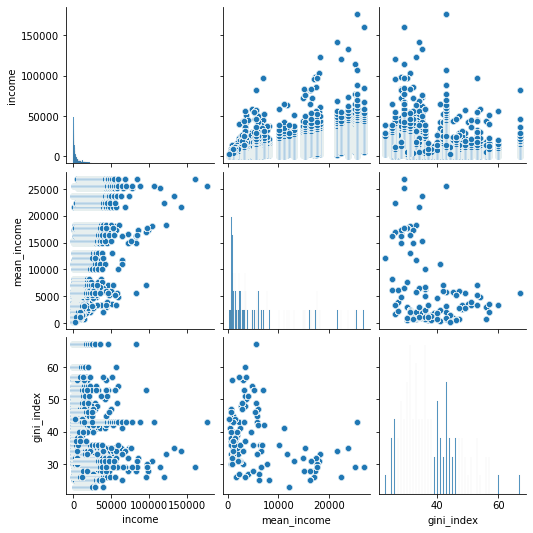

In [287]:
df_mission_4[['income', 'mean_income', 'gini_index']]
sns.pairplot(df_mission_4[['income', 'mean_income', 'gini_index']])
plt.show()

array([[<AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='mean_income', ylabel='income'>,
        <AxesSubplot:xlabel='gini_index', ylabel='income'>],
       [<AxesSubplot:xlabel='income', ylabel='mean_income'>,
        <AxesSubplot:xlabel='mean_income', ylabel='mean_income'>,
        <AxesSubplot:xlabel='gini_index', ylabel='mean_income'>],
       [<AxesSubplot:xlabel='income', ylabel='gini_index'>,
        <AxesSubplot:xlabel='mean_income', ylabel='gini_index'>,
        <AxesSubplot:xlabel='gini_index', ylabel='gini_index'>]],
      dtype=object)

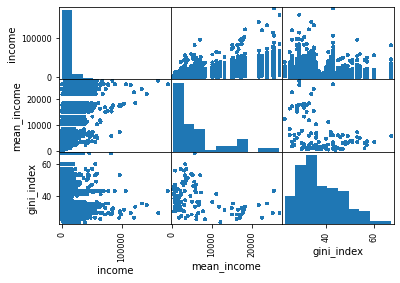

In [288]:
pd.plotting.scatter_matrix(df_mission_4[['income', 'mean_income', 'gini_index']])

Selon ce modèle, donnez la décomposition de variance totale expliquée par :
Le pays de naissance (ie. le revenu moyen et l’indice de Gini)
Les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

In [289]:
aov_table_2 = sm.stats.anova_lm(results_2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
np.log(mean_income),1.0,3.989018e+14,3.989018e+14,7.450290e+06,0.0
gini_index,1.0,7.909864e+12,7.909864e+12,1.477326e+05,0.0
Residual,11599997.0,6.210845e+14,5.354178e+07,NaN,NaN


Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le
pourcentage de variance expliquée par ce nouveau modèle ?

In [290]:
esq_sm2 = (aov_table_2['sum_sq'].sum() - aov_table_2['sum_sq'][2]) / aov_table_2['sum_sq'].sum()
print(esq_sm2)
aov_table_2['EtaSq'] = [esq_sm2, esq_sm2, 'NaN']
aov_table_2

0.3957711657378203


,df,sum_sq,mean_sq,F,PR(>F),EtaSq
np.log(mean_income),1.0,3.989018e+14,3.989018e+14,7.450290e+06,0.0,0.395771
gini_index,1.0,7.909864e+12,7.909864e+12,1.477326e+05,0.0,0.395771
Residual,11599997.0,6.210845e+14,5.354178e+07,NaN,NaN,NaN


***************************

Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le
pourcentage de variance expliquée par ce nouveau modèle ?

In [291]:
# multivariate linear regression factor : revenu moyen du pays et indice de gini
results_3 = smf.ols(formula='income ~ np.log(mean_income) + gini_index + c_i_parent' , data = df_mission_4).fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 2.814e+06
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:18:44   Log-Likelihood:            -1.1943e+08
No. Observations:            11600000   AIC:                         2.389e+08
Df Residuals:                11599996   BIC:                         2.389e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.275e+04     20.451  -1601.157      0.000   -3.28e+04   -3.27e+04
np.log(mean_income)  4911.7524      1.903   2581.569      0.000    4908.023    4915.481
gini_index            -96.0050      0.244   -392.724      0.000     -96.484     -95.526
c_i_parent             52.0382      0.073    714.401      0.000      51.895      52.181
==============================================================================
Omnibus:                 14188860.326   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3422366821.520
Skew:                           6.452   Prob(JB):                         0.00
Kurtosis:                      86.152   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
results_4 = smf.ols(formula='income ~ np.log(mean_income) + gini_index + np.log(c_i_parent)' , data = df_mission_4).fit()
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 2.736e+06
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:18:52   Log-Likelihood:            -1.1950e+08
No. Observations:            11600000   AIC:                         2.390e+08
Df Residuals:                11599996   BIC:                         2.390e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.517e+04     21.884  -1607.243      0.000   -3.52e+04   -3.51e+04
np.log(mean_income)  4911.7524      1.914   2566.384      0.000    4908.001    4915.503
gini_index            -96.0050      0.246   -390.414      0.000     -96.487     -95.523
np.log(c_i_parent)   1390.1120      2.291    606.891      0.000    1385.623    1394.601
==============================================================================
Omnibus:                 14180190.174   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3384970072.071
Skew:                           6.449   Prob(JB):                         0.00
Kurtosis:                      85.686   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Le pourcentage de variance expliqué par le modèle est de: 42.1%
Toutefois le modèle présente des limites à considérer :
    - Colinéarité positive entre les résidus: Durbin-Watson = 0, même nsi ceux-ci suivent une loi normale
    - potentiel multicolinéarité entre les variables endogènes 

En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le
fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?

Plus l'indice de gini est élevé (plus la société est inégalitaire) plus on a de chance d\'avoir un revenu bas selon le modèle (coeff négatif: -96.0050)
conclusion ==> le fait de vivre dans un pays inégalitaire défavorise clairement plus qu'il ne favorise.

*********************

Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :
Le pays de naissance et le revenu des parents
Les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

In [293]:
aov_table_3 = sm.stats.anova_lm(results_3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
np.log(mean_income),1.0,3.989018e+14,3.989018e+14,7.778082e+06,0.0
gini_index,1.0,7.909864e+12,7.909864e+12,1.542324e+05,0.0
c_i_parent,1.0,2.617443e+13,2.617443e+13,5.103683e+05,0.0
Residual,11599996.0,5.949101e+14,5.128537e+07,NaN,NaN


In [294]:
esq_sm = (aov_table_3['sum_sq'].sum() - aov_table_3['sum_sq'][3]) / aov_table_3['sum_sq'].sum()
print(esq_sm)
aov_table_3['EtaSq'] = [esq_sm, esq_sm, esq_sm, 'NaN']
print(aov_table_3)

0.42123524262025086
                             df        sum_sq       mean_sq             F  \
np.log(mean_income)         1.0  3.989018e+14  3.989018e+14  7.778082e+06   
gini_index                  1.0  7.909864e+12  7.909864e+12  1.542324e+05   
c_i_parent                  1.0  2.617443e+13  2.617443e+13  5.103683e+05   
Residual             11599996.0  5.949101e+14  5.128537e+07           NaN   

                     PR(>F)     EtaSq  
np.log(mean_income)     0.0  0.421235  
gini_index              0.0  0.421235  
c_i_parent              0.0  0.421235  
Residual                NaN       NaN  


In [295]:
df_mission.head()

,Country_Name,pj,income,gini_index,quantile,c_i_parent,mean_income
0,Albania,0.82,728.89795,30.0,1,1,2994.829902
1,Albania,0.82,728.89795,30.0,1,1,2994.829902
2,Albania,0.82,728.89795,30.0,1,1,2994.829902
3,Albania,0.82,728.89795,30.0,1,1,2994.829902
4,Albania,0.82,728.89795,30.0,1,1,2994.829902
